# Discovery & Insights

This analysis will look at the fight information and try to gain <br>
valid insights from the data.<br>
<br>
The analysis will focus around asking if there are any statistical advantages between<br>
different aspects such as stance, age and reach.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

In [2]:
# import the datset for analysis 
def import_and_create_df():

    file = ('../data/main_data.csv')
    
    # create data frame
    frame = pd.read_csv(file)
    df = frame.copy()

    return df

# Fighters

Investigate different aspects of the fighters personal metrics <br>


In [3]:
# create data frame for fighters
fighters_df = import_and_create_df().copy()

# reindex for just fighter name, weight class, height, weight, reach
fighter1 = fighters_df.reindex(columns=['Weight class','Fighter 1', 'DOB F_1','Weight F_1', 
                                        'Height F_1', 'Reach F_1', 'Stance F_1'])
fighter2 = fighters_df.reindex(columns=['Weight class','Fighter 2', 'DOB F_2', 'Weight F_2',
                                        'Height F_2', 'Reach F_2', 'Stance F_2'])

# rename the columns in each to concatenate
fighter1.rename(columns={'Fighter 1':'Fighter', 'Weight F_1':'Weight',
                            'Height F_1':'Height', 'Reach F_1':'Reach',
                         'Stance F_1': 'Stance', 'DOB F_1': 'DOB'}, inplace=True)

fighter2.rename(columns={'Fighter 2':'Fighter', 'Weight F_2':'Weight',
                            'Height F_2':'Height', 'Reach F_2':'Reach',
                         'Stance F_2': 'Stance', 'DOB F_2': 'DOB'}, inplace=True)

# concatenate both together
fighter_basic = pd.concat([fighter1, fighter2])
#drop duplicates
fighter_basic = fighter_basic.drop_duplicates(subset=['Fighter','Weight class'])

In [4]:
fighter_basic

,Weight class,Fighter,DOB,Weight,Height,Reach,Stance
0,Light Heavyweight,Glover Teixeira,1979-10-28,205,74,76,Orthodox
1,Bantamweight,Petr Yan,1993-02-11,135,67,67,Switch
2,Lightweight,Islam Makhachev,1991-10-27,155,70,70,Southpaw
3,Heavyweight,Alexander Volkov,1988-10-24,250,79,80,Orthodox
4,Welterweight,Khamzat Chimaev,1994-05-01,170,74,75,Orthodox
...,...,...,...,...,...,...,...
6150,Lightweight,Wes Albritton,1984-11-29,188,70,73,Orthodox
6153,Lightweight,Nick Sanzo,1984-11-29,190,69,76,Not Known
6155,Heavyweight,Jim Mullen,1981-05-14,215,73,72,Southpaw
6156,Lightweight,Wallid Ismail,1968-02-23,205,67,76,Orthodox


Because fighters can appear in more than one weight class, check how many fighters do.<br>
for testing fight statistics these will be counted as different fighters when checking <br>
across weight classes.

In [5]:
# check how many  fighters appear in multiple weight classes
check_fighters = fighter_basic.groupby(['Fighter'])['Weight class'].count()
check_fighters = check_fighters.to_frame()
check_fighters.rename(columns={'Weight class': 'Count'}, inplace=True)
check_fighters
check_fighters = check_fighters[check_fighters['Count'] > 1]
print('Fighters that appear in more than one weight class: ' + str(len(check_fighters)))

Fighters that appear in more than one weight class: 665


## Fighter Stance

Starting with a basic check of fighter stances and distribution in general <br>
as well as distribution across each weight class

In [6]:
# count the number of fighters per stance and the % of fighters with each stance
stance_count = fighter_basic.copy()

# create a grouped dataframe of the stances
stance_count = stance_count.groupby('Stance')['Stance'].count()
stance_count = stance_count.to_frame()
stance_count.rename(columns={'Stance':'Count'}, inplace=True)
stance_count = stance_count.sort_values(by=['Count'], ascending=False)

# calculate the percentage and reset the index
stance_count['Percentage'] = round((stance_count['Count'] / stance_count['Count'].sum())*100,3)
stance_count.reset_index(inplace=True)


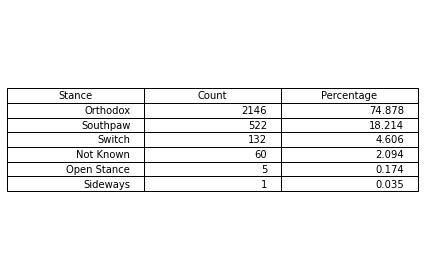

In [7]:
# plot a table of the stances count and percentages
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=stance_count.values, colLabels = stance_count.columns, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/stance_prevelance.jpg', bbox_inches="tight", dpi=450)
plt.show()

Many imperical studies have been done on frequency of left handedness in different countries <br>
These can be influenced by culture and geography, but the largest study as of 2020 meausrng the <br>
prevelance of "left handedness" was carried out by (Papadatou-Pastou, M., Ntolka, E., Schmitz, J., Martin, M.,<br>
Munafò, M. R., Ocklenburg, S., & Paracchini, S. (2020). Human handedness: A meta-analysis.<br>
Psychological Bulletin, 146(6), 481–524) and found the prevelance to be between 9.3% and 18.1%. <br>

The best overall esitmate from the study puts the general prevelance at 10.6% <br>
and when removing studies assessing elit athletes (such as in the UFC) it was found to be<br>
approx 10.4%

The southpaw stance in fighting is the natural fighting position for trained, left handed fighters<br>
and from active fighters in the UFC the prevelance of the use of the Southpaw stance is at and slightly<br>
above this percentage at 18.214%.

In [8]:
# create function to plot the bar graph and export png
def plot_bar(frame,img_name, items):
    count = frame.groupby(items)[items].count()
    count  = count.to_frame()
    count.rename(columns={items:'Count'}, inplace=True)
    count.reset_index(inplace = True)

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    
    bar_x = count[items]
    bar_y = count['Count']
    bar_plot = plt.bar(bar_x, bar_y)
    plt.xticks(rotation=90)
    plt.title(items)
    plt.ylabel('Number of Fights')
    

    
    def sum_label(rec):
        for idx,rec in enumerate(bar_plot):
            height = rec.get_height()
            ax.text(rec.get_x() + rec.get_width()/2., height,
                    bar_y[idx],
                    ha='center', va='bottom', rotation=0)
    
    sum_label(bar_plot)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig('../discovery/'+ 
                img_name +'.jpg', bbox_inches="tight", dpi=450)
    
    plt.show()
    plt.clf()
    plt.close()

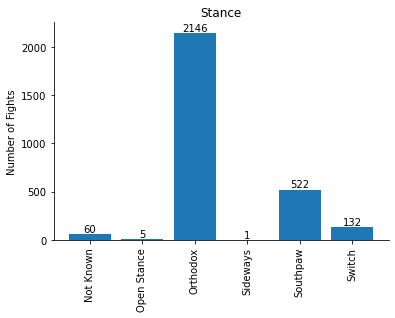

In [9]:
# plot stances on graphs
plot_bar(fighter_basic, 'Stances', 'Stance')

In [10]:
# count how many of each stance there is used per weight class (not including NaN)
stances = fighter_basic.copy()
stance_count_wc = stances.groupby(['Weight class','Stance'])['Stance'].count()
stance_wc_count = stance_count_wc.to_frame('Count')
stance_wc = stance_wc_count.reset_index()
stance_wc

# Seperate out each weight class
Bantamweight = stance_wc[stance_wc['Weight class'].str.contains('Bantamweight', na=False)& 
                (~stance_wc['Weight class'].str.contains('Women'))]            
Catch_Weight = stance_wc[stance_wc['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = stance_wc[stance_wc['Weight class'].str.contains('Featherweight', na=False)& 
                (~stance_wc['Weight class'].str.contains('Women'))]           
Flyweight = stance_wc[stance_wc['Weight class'].str.contains('Flyweight', na=False)& 
                (~stance_wc['Weight class'].str.contains('Women'))]                
Heavyweight = stance_wc[stance_wc['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = stance_wc[stance_wc['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = stance_wc[stance_wc['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = stance_wc[stance_wc['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = stance_wc[stance_wc['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = stance_wc[stance_wc['Weight class'].str.contains("Women's Strawweight", na=False)] 

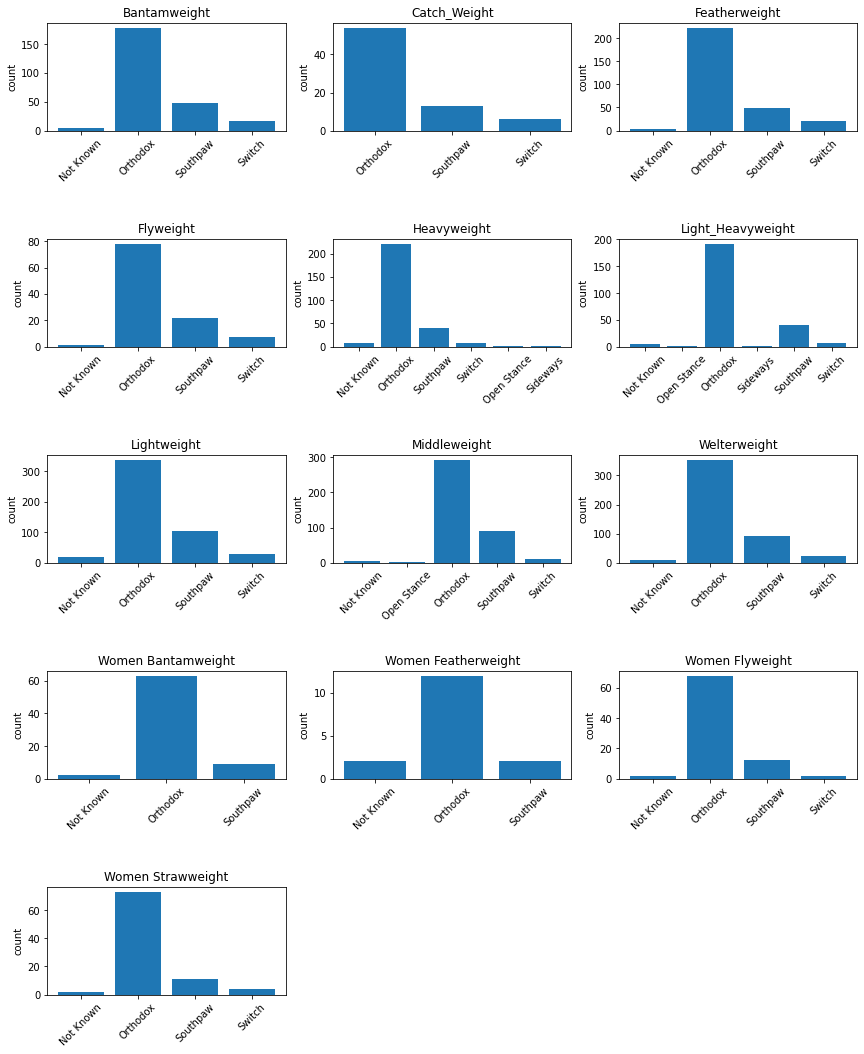

In [11]:
# add bar charts
plt.subplot(5,3,1)
plt.bar(Bantamweight['Stance'], Bantamweight['Count'])
plt.xticks(rotation=45)
plt.title('Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,2)
plt.bar(Catch_Weight['Stance'], Catch_Weight['Count'])
plt.xticks(rotation=45)
plt.title('Catch_Weight')
plt.ylabel('count')

plt.subplot(5,3,3)
plt.bar(Featherweight['Stance'], Featherweight['Count'])
plt.xticks(rotation=45)
plt.title('Featherweight')
plt.ylabel('count')

plt.subplot(5,3,4)
plt.bar(Flyweight['Stance'], Flyweight['Count'])
plt.xticks(rotation=45)
plt.title('Flyweight')
plt.ylabel('count')

plt.subplot(5,3,5)
plt.bar(Heavyweight['Stance'], Heavyweight['Count'])
plt.xticks(rotation=45)
plt.title('Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,6)
plt.bar(Light_Heavyweight['Stance'], Light_Heavyweight['Count'])
plt.xticks(rotation=45)
plt.title('Light_Heavyweight')
plt.ylabel('count')

plt.subplot(5,3,7)
plt.bar(Lightweight['Stance'], Lightweight['Count'])
plt.xticks(rotation=45)
plt.title('Lightweight')
plt.ylabel('count')

plt.subplot(5,3,8)
plt.bar(Middleweight['Stance'], Middleweight['Count'])
plt.xticks(rotation=45)
plt.title('Middleweight')
plt.ylabel('count')

plt.subplot(5,3,9)
plt.bar(Welterweight['Stance'], Welterweight['Count'])
plt.xticks(rotation=45)
plt.title('Welterweight')
plt.ylabel('count')

plt.subplot(5,3,10)
plt.bar(Women_Bantamweight['Stance'], Women_Bantamweight['Count'])
plt.xticks(rotation=45)
plt.title('Women Bantamweight')
plt.ylabel('count')

plt.subplot(5,3,11)
plt.bar(Women_Featherweight['Stance'], Women_Featherweight['Count'])
plt.xticks(rotation=45)
plt.title('Women Featherweight')
plt.ylabel('count')

plt.subplot(5,3,12)
plt.bar(Women_Flyweight['Stance'], Women_Flyweight['Count'])
plt.xticks(rotation=45)
plt.title('Women Flyweight')
plt.ylabel('count')

plt.subplot(5,3,13)
plt.bar(Women_Strawweight['Stance'], Women_Strawweight['Count'])
plt.xticks(rotation=45)
plt.title('Women Strawweight')
plt.ylabel('count')

plt.subplots_adjust(top=3.5, right=2.0, hspace=1.0)
plt.savefig('../discovery/weight_class_stances.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [12]:
# count the number of fighters per stance in each weight class and the % of fighters with each stance
stance_count_weight_class = fighter_basic.copy()

# create a grouped dataframe of the stances
stance_count_weight_class = stance_count_weight_class.groupby(['Weight class','Stance'])['Stance'].count()
stance_count_weight_class = stance_count_weight_class.to_frame()
stance_count_weight_class.rename(columns={'Stance':'Count'}, inplace=True)
stance_count_weight_class = stance_count_weight_class.sort_values(by=['Weight class'], ascending=True)

# calculate the percentage and reset the index
stance_count_weight_class['Percentage'] = round((stance_count_weight_class['Count'] / 
                                                 stance_count_weight_class.groupby('Weight class')['Count'].sum())*100,3)
stance_count_weight_class.reset_index(inplace=True)


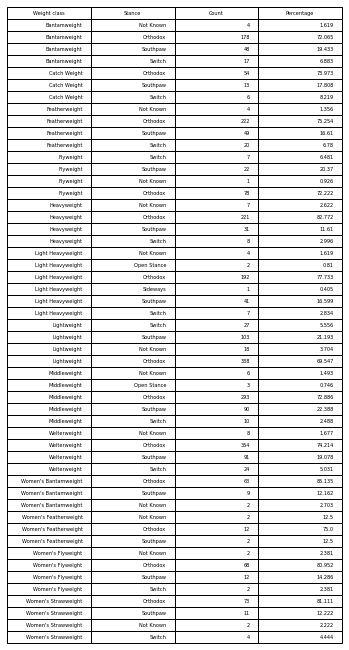

In [13]:
# plot a table of the stances count and percentages
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=stance_count_weight_class.values, colLabels = stance_count_weight_class.columns, loc='center')

# disply and save the table
plt.savefig('../discovery/stance_weightclass_prevelance.jpg', bbox_inches="tight", dpi=450)
plt.show()

From the table there appears to be a greater percentage of southpaw fighters in mens weight classes<br>
than womens weight classes. There also seems to be a pattern of higher percentage in the middle are of <br>
the weight classes. 

Plot the percentages of southpaw for each of the mens weight classes, <br>
except for the catchweight which is not a standard weight class but a weight class<br>
for fights between fighters of different weight classes with an agreed upon weight <br>
for both fighters before the fight where the weight falls outside a pre designated weight class.

In [14]:
# prepare the values for the y axis
flyweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Flyweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     ~stance_count_weight_class['Weight class'].str.contains('Women')]

bantamweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Bantamweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     ~stance_count_weight_class['Weight class'].str.contains('Women')]

featherweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Featherweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     ~stance_count_weight_class['Weight class'].str.contains('Women')]

lightweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Lightweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw')]

welterweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Welterweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw')]

middleweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Middleweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw')]

lightheavyweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Light Heavyweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw')]

heavyweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Heavyweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw')]


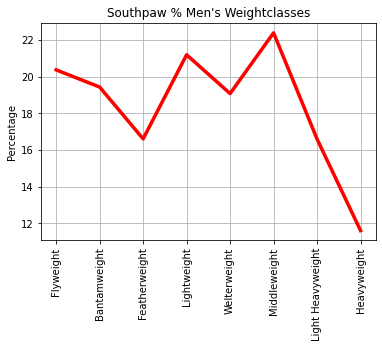

In [15]:
# set the values for x axis 
x1 = np.array(['Flyweight','Bantamweight','Featherweight','Lightweight',
               'Welterweight','Middleweight','Light Heavyweight', 'Heavyweight'])

# set the values for the y axis
y1 = np.array([flyweight['Percentage'].values[0],bantamweight['Percentage'].values[0],featherweight['Percentage'].values[0],
               lightweight['Percentage'].values[0],welterweight['Percentage'].values[0],middleweight['Percentage'].values[0],
               lightheavyweight['Percentage'].values[0],heavyweight['Percentage'].values[0]])

plt.xticks(rotation=90)
plt.plot(x1, y1, color = 'r',  linewidth = '3.5')
plt.ylabel("Percentage")
plt.title("Southpaw % Men's Weightclasses")
plt.grid()
plt.savefig('../discovery/stance_weightclass_percent_line.jpg', bbox_inches="tight", dpi=450)
plt.show()

Plot the percentages of southpaw for each of the womens weight classes

In [16]:
# prepare the values for the y axis
wstrawweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Strawweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     stance_count_weight_class['Weight class'].str.contains('Women')]

wflyweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Flyweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     stance_count_weight_class['Weight class'].str.contains('Women')]

wbantamweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Bantamweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     stance_count_weight_class['Weight class'].str.contains('Women')]

wfeatherweight = stance_count_weight_class[stance_count_weight_class['Weight class'].str.contains('Featherweight') &
                                     stance_count_weight_class['Stance'].str.contains('Southpaw') & 
                                     stance_count_weight_class['Weight class'].str.contains('Women')]

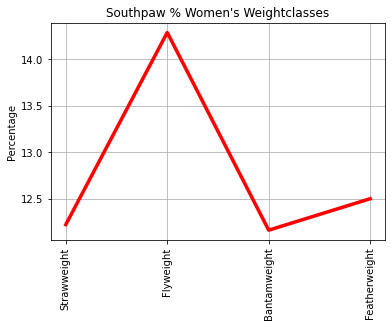

In [17]:
# set the values for x axis 
x1 = np.array(['Strawweight','Flyweight','Bantamweight','Featherweight'])

# set the values for the y axis
y1 = np.array([wstrawweight['Percentage'].values[0],wflyweight['Percentage'].values[0],
               wbantamweight['Percentage'].values[0],wfeatherweight['Percentage'].values[0]])

plt.xticks(rotation=90)
plt.plot(x1, y1, color = 'r',  linewidth = '3.5')
plt.ylabel("Percentage")
plt.title("Southpaw % Women's Weightclasses")
plt.grid()
plt.savefig('../discovery/stance_weightclass_women_percent_line.jpg', bbox_inches="tight", dpi=450)
plt.show()

### Basic Correlation Tests

A few simple checks if there is any correlation between a fighters stance and their height, <br>
weight, reach and age. It is a expected there is wouldn't be any correlation but it might <br>
be worth investigating. <br>

In [18]:
# stance and other metric correlations
stance_corr = fighter_basic.copy()

# create age column
stance_corr['DOB'] = pd.to_datetime(stance_corr['DOB'])
now = pd.Timestamp('now')
stance_corr['Age'] = (now - stance_corr['DOB']).astype('<m8[Y]')
#factorize the stances
stance_corr['Stance'] = pd.factorize(stance_corr['Stance'])[0]
stance_corr.head()

,Weight class,Fighter,DOB,Weight,Height,Reach,Stance,Age
0,Light Heavyweight,Glover Teixeira,1979-10-28,205,74,76,0,42.0
1,Bantamweight,Petr Yan,1993-02-11,135,67,67,1,28.0
2,Lightweight,Islam Makhachev,1991-10-27,155,70,70,2,30.0
3,Heavyweight,Alexander Volkov,1988-10-24,250,79,80,0,33.0
4,Welterweight,Khamzat Chimaev,1994-05-01,170,74,75,0,27.0


In [19]:
# height correlation
heightCorr = stance_corr['Stance'].corr(stance_corr['Height'])
heightCorr

0.01885814046825591

In [20]:
# weight correlation
weightCorr = stance_corr['Stance'].corr(stance_corr['Weight'])
weightCorr

-0.023827647211863003

In [21]:
# reach correlation
reachCorr = stance_corr['Stance'].corr(stance_corr['Reach'])
reachCorr

0.0031010299846606446

In [22]:
# Age correlation
ageCorr = stance_corr['Stance'].corr(stance_corr['Age'])
ageCorr

-0.01227259550742199

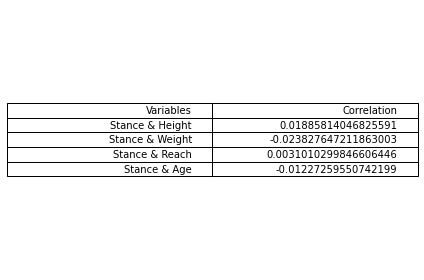

In [23]:
# plot a table of the stances correlations
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

corr_table = [
    ['Variables', 'Correlation'],
    ['Stance & Height', heightCorr],
    ['Stance & Weight', weightCorr],
    ['Stance & Reach', reachCorr],
    ['Stance & Age', ageCorr]
]

#create the table
table = ax.table(cellText=corr_table, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/stance_correlations.jpg', bbox_inches="tight", dpi=450)
plt.show()

As expected no correlations where found between fighters stance and <br>
their height, weight, reach or age. <br>

## Southpaw versus Orthodox

Southpaw and Orthodox are the two most popular stances and are the two basic subsets of <br>
Left Hand stance and Right Hand Stance. In either Orthodox or Southpaw the lead hand is known <br>
to generaly be the weaker hand and is used to setup more powerful strikes from the back hand which is <br>
primarly the stronger hand. For that reason these are known as left and Right handed stances. <br>
and for the purpose of this investigation will be classed as such.

Therefore it makes sense to investigate if there is a inherint statistical advantage <br>
for one stance or the other when the two are in competitiion with eachother.

#### Hypothesis

The Null Hypothesis in this test is: There is no statistical difference between Orthodox and Southpaw <br>
when in a competing match up in the UFC

Alternate Hypothesis is that there is a statistical difference between the stances

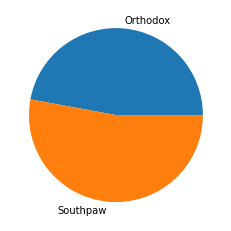

In [24]:
# create duplicate of main dataframe
fighter_stance = import_and_create_df()

# filter out just southpaw v orthodox fights
fighter_stance = fighter_stance[(fighter_stance['Stance F_1'].str.contains('Orthodox') & 
                                 fighter_stance['Stance F_2'].str.contains('Southpaw')) |
                               (fighter_stance['Stance F_1'].str.contains('Southpaw') & 
                                 fighter_stance['Stance F_2'].str.contains('Orthodox'))]

# winner stance is the F_1 stance who was the winner
fighter_stance['Winner Stance'] = fighter_stance['Stance F_1']

# create table for pie chart
fighter_stance_1 = fighter_stance.groupby('Winner Stance')['Winner Stance'].count()
fighter_stance_1 = fighter_stance_1.to_frame()
fighter_stance_1.rename(columns={'Winner Stance':'Count'}, inplace=True)
fighter_stance_1.reset_index(inplace=True)

# pie chart
plt.pie(fighter_stance_1['Count'], labels=fighter_stance_1['Winner Stance'])
plt.savefig('../discovery/winner_stance_pie.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [25]:
# seperate out the weight classes for pie charts

# Seperate out each weight class
Bantamweight = fighter_stance[(fighter_stance['Weight class'].str.contains('Bantamweight', na=False))& 
                (~fighter_stance['Weight class'].str.contains('Women'))]            
Catch_Weight = fighter_stance[fighter_stance['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = fighter_stance[(fighter_stance['Weight class'].str.contains('Featherweight', na=False))& 
                (~fighter_stance['Weight class'].str.contains('Women'))]           
Flyweight = fighter_stance[(fighter_stance['Weight class'].str.contains('Flyweight', na=False))& 
                (~fighter_stance['Weight class'].str.contains('Women'))]                
Heavyweight = fighter_stance[fighter_stance['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = fighter_stance[fighter_stance['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = fighter_stance[fighter_stance['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = fighter_stance[fighter_stance['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = fighter_stance[fighter_stance['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = fighter_stance[fighter_stance['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = fighter_stance[fighter_stance['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = fighter_stance[fighter_stance['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = fighter_stance[fighter_stance['Weight class'].str.contains("Women's Strawweight", na=False)] 

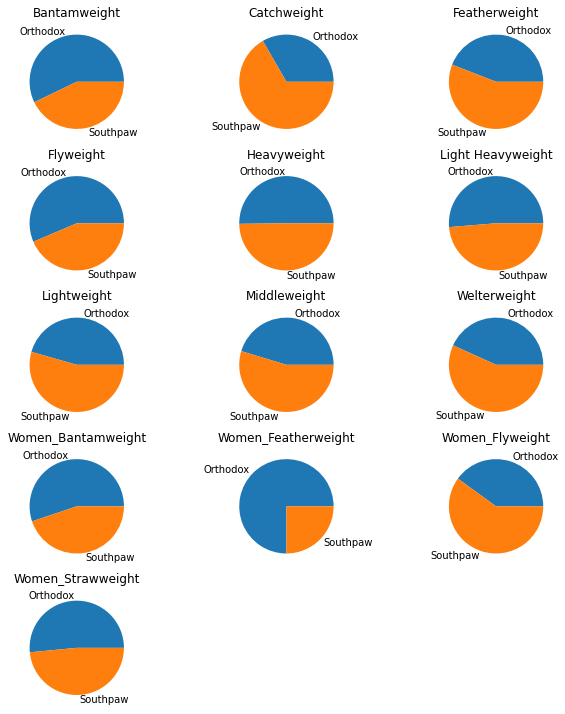

In [26]:

# bantamweight
Bantamweight_Stance = Bantamweight.groupby('Winner Stance')['Winner Stance'].count()
Bantamweight_Stance = Bantamweight_Stance.to_frame()
Bantamweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Bantamweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,1)
plt.pie(Bantamweight_Stance['Count'], labels=Bantamweight_Stance['Winner Stance'])
plt.title('Bantamweight')

# catchweight
Catch_Weight_Stance = Catch_Weight.groupby('Winner Stance')['Winner Stance'].count()
Catch_Weight_Stance = Catch_Weight_Stance.to_frame()
Catch_Weight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Catch_Weight_Stance.reset_index(inplace=True)

plt.subplot(5,3,2)
plt.pie(Catch_Weight_Stance['Count'], labels=Catch_Weight_Stance['Winner Stance'])
plt.title('Catchweight')

# featherweight
Featherweight_Stance = Featherweight.groupby('Winner Stance')['Winner Stance'].count()
Featherweight_Stance = Featherweight_Stance.to_frame()
Featherweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Featherweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,3)
plt.pie(Featherweight_Stance['Count'], labels=Featherweight_Stance['Winner Stance'])
plt.title('Featherweight')

# flyweight
Flyweight_Stance = Flyweight.groupby('Winner Stance')['Winner Stance'].count()
Flyweight_Stance = Flyweight_Stance.to_frame()
Flyweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Flyweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,4)
plt.pie(Flyweight_Stance['Count'], labels=Flyweight_Stance['Winner Stance'])
plt.title('Flyweight')

# Heavyweight
Heavyweight_Stance = Heavyweight.groupby('Winner Stance')['Winner Stance'].count()
Heavyweight_Stance = Heavyweight_Stance.to_frame()
Heavyweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Heavyweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,5)
plt.pie(Heavyweight_Stance['Count'], labels=Heavyweight_Stance['Winner Stance'])
plt.title('Heavyweight')

# Light_Heavyweight
Light_Heavyweight_Stance = Light_Heavyweight.groupby('Winner Stance')['Winner Stance'].count()
Light_Heavyweight_Stance = Light_Heavyweight_Stance.to_frame()
Light_Heavyweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Light_Heavyweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,6)
plt.pie(Light_Heavyweight_Stance['Count'], labels=Light_Heavyweight_Stance['Winner Stance'])
plt.title('Light Heavyweight')

# Lightweight
Lightweight_Stance = Lightweight.groupby('Winner Stance')['Winner Stance'].count()
Lightweight_Stance = Lightweight_Stance.to_frame()
Lightweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Lightweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,7)
plt.pie(Lightweight_Stance['Count'], labels=Lightweight_Stance['Winner Stance'])
plt.title('Lightweight')

# Middleweight
Middleweight_Stance = Middleweight.groupby('Winner Stance')['Winner Stance'].count()
Middleweight_Stance = Middleweight_Stance.to_frame()
Middleweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Middleweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,8)
plt.pie(Middleweight_Stance['Count'], labels=Middleweight_Stance['Winner Stance'])
plt.title('Middleweight')

# Welterweight
Welterweight_Stance = Welterweight.groupby('Winner Stance')['Winner Stance'].count()
Welterweight_Stance = Welterweight_Stance.to_frame()
Welterweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Welterweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,9)
plt.pie(Welterweight_Stance['Count'], labels=Welterweight_Stance['Winner Stance'])
plt.title('Welterweight')

# Women_Bantamweight
Women_Bantamweight_Stance = Women_Bantamweight.groupby('Winner Stance')['Winner Stance'].count()
Women_Bantamweight_Stance = Women_Bantamweight_Stance.to_frame()
Women_Bantamweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Women_Bantamweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,10)
plt.pie(Women_Bantamweight_Stance['Count'], labels=Women_Bantamweight_Stance['Winner Stance'])
plt.title('Women_Bantamweight')

# Women_Featherweight
Women_Featherweight_Stance = Women_Featherweight.groupby('Winner Stance')['Winner Stance'].count()
Women_Featherweight_Stance = Women_Featherweight_Stance.to_frame()
Women_Featherweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Women_Featherweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,11)
plt.pie(Women_Featherweight_Stance['Count'], labels=Women_Featherweight_Stance['Winner Stance'])
plt.title('Women_Featherweight')

# Women_Flyweight
Women_Flyweight_Stance = Women_Flyweight.groupby('Winner Stance')['Winner Stance'].count()
Women_Flyweight_Stance = Women_Flyweight_Stance.to_frame()
Women_Flyweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Women_Flyweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,12)
plt.pie(Women_Flyweight_Stance['Count'], labels=Women_Flyweight_Stance['Winner Stance'])
plt.title('Women_Flyweight')

# Women_Strawweight
Women_Strawweight_Stance = Women_Strawweight.groupby('Winner Stance')['Winner Stance'].count()
Women_Strawweight_Stance = Women_Strawweight_Stance.to_frame()
Women_Strawweight_Stance.rename(columns={'Winner Stance':'Count'}, inplace=True)
Women_Strawweight_Stance.reset_index(inplace=True)

plt.subplot(5,3,13)
plt.pie(Women_Strawweight_Stance['Count'], labels=Women_Strawweight_Stance['Winner Stance'])
plt.title('Women_Strawweight')


plt.subplots_adjust(top=2.5, right=1.5)
plt.savefig('../discovery/winner_Stance_weightclass.jpg', bbox_inches="tight", dpi=450)
plt.show()


In [27]:
# apply a chi squared test
def chi_squared_test(name,observed, expected, dof, alpha):
        
    # get the chi squared stat
    chi_squared_stat = (((observed - expected)**2)/expected).sum()
    chi = float(chi_squared_stat)
    
    # get correct alpha
    a = 1 - alpha 
    
    # find the critical value
    crit = stats.chi2.ppf(q = a, df = dof)
    
    # find the p value
    p_value = 1 - stats.chi2.cdf( x = chi_squared_stat, df = dof)
    p = float(p_value)
    
    result = ''
    
    # reject or accept the null hyothesis, 
    if(p > alpha):
        result = result + ("Fail to reject Null Hypothesis")
    else:
        result = result + ("Reject Null Hypotheses")
        
    # plot a table of the stances correlations
    fig, ax = plt.subplots()

    # hide the axis
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')

    chi_table = [
        ['Chi squared stat', chi],
        ['\u03B1', alpha],
        ['Critical value', crit],
        ['P value', p],
        ['Result',result]
    ]

    #create the table
    table = ax.table(cellText=chi_table, loc='center')

    # disply and save the table
    plt.title(name, y=1.0, pad=-94)
    fig.tight_layout()
    plt.savefig('../discovery/chi_'+ name +'.jpg', bbox_inches="tight", dpi=450)
    plt.show()

In [28]:
# create the the observed and expected results for Orthodox v Southpaw
def southpaw_v_orthodox():
    
    # import the data
    df  = import_and_create_df().copy()
    
    # filter only for fights thaat have a southpaw and orthodox stances
    df = df[(df['Stance F_1'].str.contains('Orthodox') & df['Stance F_2'].str.contains('Southpaw')) |
            (df['Stance F_1'].str.contains('Southpaw') & df['Stance F_2'].str.contains('Orthodox'))]

    # get the number of fights
    num_fights = len(df)
    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Southpaw'] * len(df[df['Stance F_1'].str.contains('Southpaw')]) + \
                       ['Orthodox'] * len(df[df['Stance F_1'].str.contains('Orthodox')]))
    
    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Southpaw'] * flights_split + ['Orthodox'] * flights_split)
    
    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [29]:
# create dataframes of observed and expected results
data = southpaw_v_orthodox()
observed = data[0]
expected = data[1]

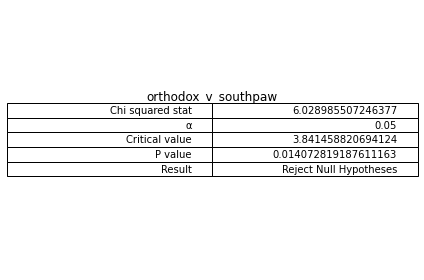

In [30]:
# apply the chi squared test to the results
chi_squared_test('orthodox_v_southpaw',observed, expected, 1, 0.05)

Investigate if the same applies to each weight class also

In [31]:
df_count  = import_and_create_df().copy()
    
# filter only for fights that have a southpaw and orthodox stances
df_count = df_count[(df_count['Stance F_1'].str.contains('Orthodox') & df_count['Stance F_2'].str.contains('Southpaw')) |
        (df_count['Stance F_1'].str.contains('Southpaw') & df_count['Stance F_2'].str.contains('Orthodox'))]

df_count = df_count.groupby('Weight class')['Weight class'].count()
df_count

Weight class
Bantamweight             126
Catch Weight              12
Featherweight            127
Flyweight                 78
Heavyweight              117
Light Heavyweight        154
Lightweight              408
Middleweight             331
Welterweight             340
Women's Bantamweight      29
Women's Featherweight      4
Women's Flyweight         35
Women's Strawweight       33
Name: Weight class, dtype: int64

In [32]:
# create the observed and expected results for Orthodox v Southpaw
def southpaw_v_orthodox_weightclass(weightclass, gender):
    
    # import the data
    df  = import_and_create_df().copy()
    
    # filter only for fights thaat have a southpaw and orthodox stances
    df = df[(df['Stance F_1'].str.contains('Orthodox') & df['Stance F_2'].str.contains('Southpaw')) |
            (df['Stance F_1'].str.contains('Southpaw') & df['Stance F_2'].str.contains('Orthodox'))]
    
    if(gender == 'M'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (~df['Weight class'].str.contains('Women'))]
    elif(gender == 'F'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (df['Weight class'].str.contains('Women'))]
        
    # get the number of fights
    num_fights = len(df)

    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Southpaw'] * len(df[df['Stance F_1'].str.contains('Southpaw')]) + \
                       ['Orthodox'] * len(df[df['Stance F_1'].str.contains('Orthodox')]))

    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Southpaw'] * flights_split + ['Orthodox'] * flights_split)

    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [33]:
# get data for each of the mens weight classes, pass in weight class and M for Male or F for female

# Flyweighgt
fly_data = southpaw_v_orthodox_weightclass('Flyweight', 'M')
fly_observed = fly_data[0]
fly_expected = fly_data[1]

# Bantamweight
bw_data = southpaw_v_orthodox_weightclass('Bantamweight', 'M')
bw_observed = bw_data[0]
bw_expected = bw_data[1]

# Featherweight
fw_data = southpaw_v_orthodox_weightclass('Featherweight', 'M')
fw_observed = fw_data[0]
fw_expected = fw_data[1]

# Lightweight
lw_data = southpaw_v_orthodox_weightclass('Lightweight', 'M')
lw_observed = lw_data[0]
lw_expected = lw_data[1]

# Welterweight
ww_data = southpaw_v_orthodox_weightclass('Welterweight', 'M')
ww_observed = ww_data[0]
ww_expected = ww_data[1]

# Middelweight
mw_data = southpaw_v_orthodox_weightclass('Middleweight', 'M')
mw_observed = mw_data[0]
mw_expected = mw_data[1]

# Light Heavy weight
lhw_data = southpaw_v_orthodox_weightclass('Light Heavyweight', 'M')
lhw_observed = lhw_data[0]
lhw_expected = lhw_data[1]

# Heavyweight
hw_data = southpaw_v_orthodox_weightclass('Heavyweight', 'M')
hw_observed = hw_data[0]
hw_expected = hw_data[1]

# Catchweight
cw_data = southpaw_v_orthodox_weightclass('Catch Weight', 'M')
cw_observed = cw_data[0]
cw_expected = cw_data[1]

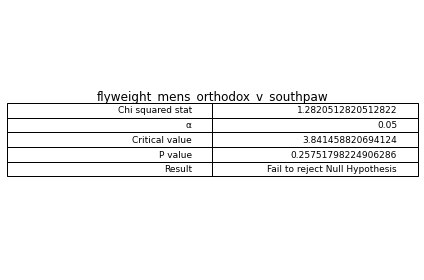

In [34]:
# apply the chi squared test to the results
chi_squared_test('flyweight_mens_orthodox_v_southpaw',fly_observed, fly_expected, 1, 0.05)

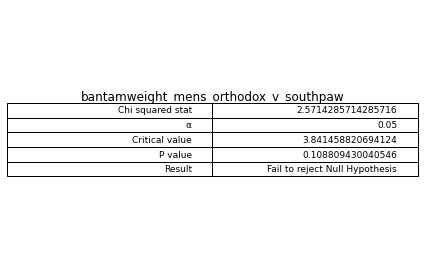

In [35]:
# apply the chi squared test to the results
chi_squared_test('bantamweight_mens_orthodox_v_southpaw',bw_observed, bw_expected, 1, 0.05)

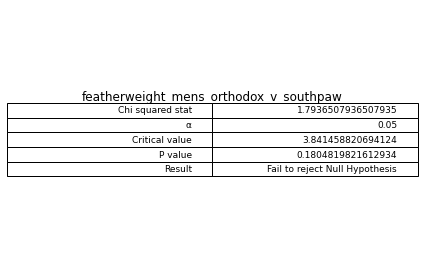

In [36]:
# apply the chi squared test to the results
chi_squared_test('featherweight_mens_orthodox_v_southpaw',fw_observed, fw_expected, 1, 0.05)

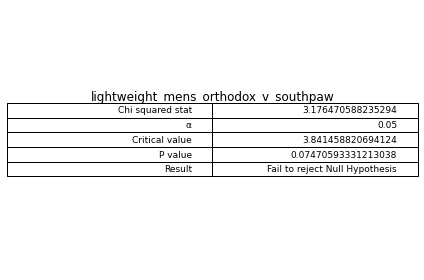

In [37]:
# apply the chi squared test to the results
chi_squared_test('lightweight_mens_orthodox_v_southpaw',lw_observed, lw_expected, 1, 0.05)

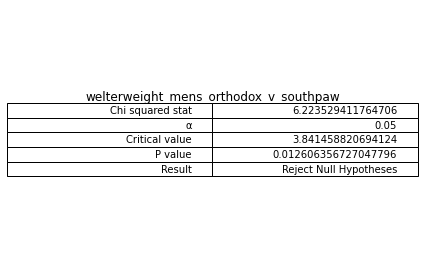

In [38]:
# apply the chi squared test to the results
chi_squared_test('welterweight_mens_orthodox_v_southpaw',ww_observed, ww_expected, 1, 0.05)

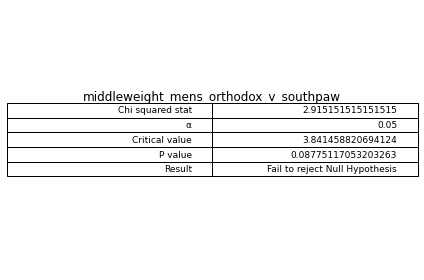

In [39]:
# apply the chi squared test to the results
chi_squared_test('middleweight_mens_orthodox_v_southpaw',mw_observed, mw_expected, 1, 0.05)

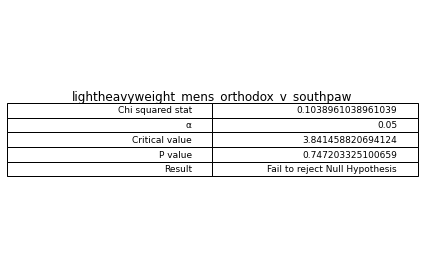

In [40]:
# apply the chi squared test to the results
chi_squared_test('lightheavyweight_mens_orthodox_v_southpaw',lhw_observed, lhw_expected, 1, 0.05)

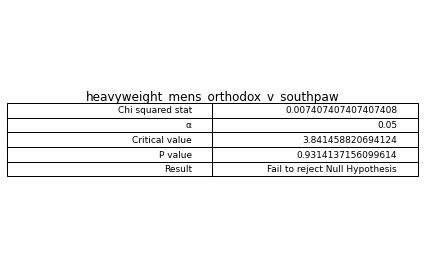

In [41]:
# apply the chi squared test to the results
chi_squared_test('heavyweight_mens_orthodox_v_southpaw',hw_observed, hw_expected, 1, 0.05)

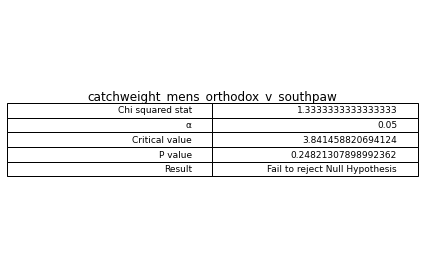

In [42]:
# apply the chi squared test to the results
chi_squared_test('catchweight_mens_orthodox_v_southpaw',cw_observed, cw_expected, 1, 0.05)

In [43]:
# get data for each of the womens weight classes, pass in weight class and M for Male or F for female

# Strawweighgt
wstraw_data = southpaw_v_orthodox_weightclass('Strawweight', 'F')
wstraw_observed = wstraw_data[0]
wstraw_expected = wstraw_data[1]

# Flyweighgt
wfly_data = southpaw_v_orthodox_weightclass('Flyweight', 'F')
wfly_observed = wfly_data[0]
wfly_expected = wfly_data[1]

# Bantamweight
wbw_data = southpaw_v_orthodox_weightclass('Bantamweight', 'F')
wbw_observed = wbw_data[0]
wbw_expected = wbw_data[1]

# Featherweight
wfw_data = southpaw_v_orthodox_weightclass('Featherweight', 'F')
wfw_observed = wfw_data[0]
wfw_expected = wfw_data[1]

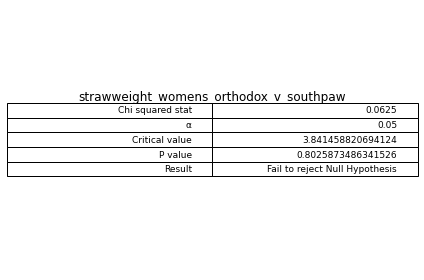

In [44]:
# apply the chi squared test to the results
chi_squared_test('strawweight_womens_orthodox_v_southpaw',wstraw_observed, wstraw_expected, 1, 0.05)

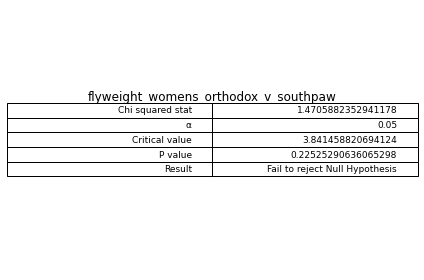

In [45]:
# apply the chi squared test to the results
chi_squared_test('flyweight_womens_orthodox_v_southpaw',wfly_observed, wfly_expected, 1, 0.05)

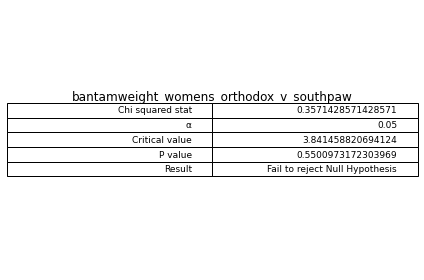

In [46]:
# apply the chi squared test to the results
chi_squared_test('bantamweight_womens_orthodox_v_southpaw',wbw_observed, wbw_expected, 1, 0.05)

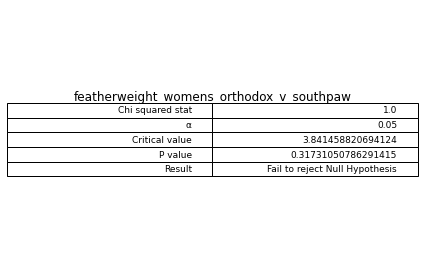

In [47]:
# apply the chi squared test to the results
chi_squared_test('featherweight_womens_orthodox_v_southpaw',wfw_observed, wfw_expected, 1, 0.05)

## Fighter Age

Investigate wether a fighters age has any statistical difference when comparing <br>
younger versus older to the outcome in a fight <br>

In [48]:
# create duplicate of fighter basic dataframe
fighter_ages = fighter_basic.copy()

In [49]:
now = pd.Timestamp('now')
fighter_ages['DOB'] = pd.to_datetime(fighter_ages['DOB'], format='%Y-%m-%d')
fighter_ages['Age'] = (now - fighter_ages['DOB']).astype('<m8[Y]') 
fighter_ages

,Weight class,Fighter,DOB,Weight,Height,Reach,Stance,Age
0,Light Heavyweight,Glover Teixeira,1979-10-28,205,74,76,Orthodox,42.0
1,Bantamweight,Petr Yan,1993-02-11,135,67,67,Switch,28.0
2,Lightweight,Islam Makhachev,1991-10-27,155,70,70,Southpaw,30.0
3,Heavyweight,Alexander Volkov,1988-10-24,250,79,80,Orthodox,33.0
4,Welterweight,Khamzat Chimaev,1994-05-01,170,74,75,Orthodox,27.0
...,...,...,...,...,...,...,...,...
6150,Lightweight,Wes Albritton,1984-11-29,188,70,73,Orthodox,37.0
6153,Lightweight,Nick Sanzo,1984-11-29,190,69,76,Not Known,37.0
6155,Heavyweight,Jim Mullen,1981-05-14,215,73,72,Southpaw,40.0
6156,Lightweight,Wallid Ismail,1968-02-23,205,67,76,Orthodox,53.0


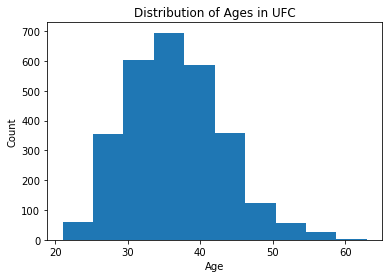

In [50]:
# plot the height distribution of UFC fighters
plt.hist(fighter_ages['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages in UFC')
plt.savefig('../discovery/age_distribution.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [51]:
# seperate out the weight classes for pie charts

# Seperate out each weight class
Bantamweight = fighter_ages[(fighter_ages['Weight class'].str.contains('Bantamweight', na=False))& 
                (~fighter_ages['Weight class'].str.contains('Women'))]            
Catch_Weight = fighter_ages[fighter_ages['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = fighter_ages[(fighter_ages['Weight class'].str.contains('Featherweight', na=False))& 
                (~fighter_ages['Weight class'].str.contains('Women'))]           
Flyweight = fighter_ages[(fighter_ages['Weight class'].str.contains('Flyweight', na=False))& 
                (~fighter_ages['Weight class'].str.contains('Women'))]                
Heavyweight = fighter_ages[fighter_ages['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = fighter_ages[fighter_ages['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = fighter_ages[fighter_ages['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = fighter_ages[fighter_ages['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = fighter_ages[fighter_ages['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = fighter_ages[fighter_ages['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = fighter_ages[fighter_ages['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = fighter_ages[fighter_ages['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = fighter_ages[fighter_ages['Weight class'].str.contains("Women's Strawweight", na=False)] 

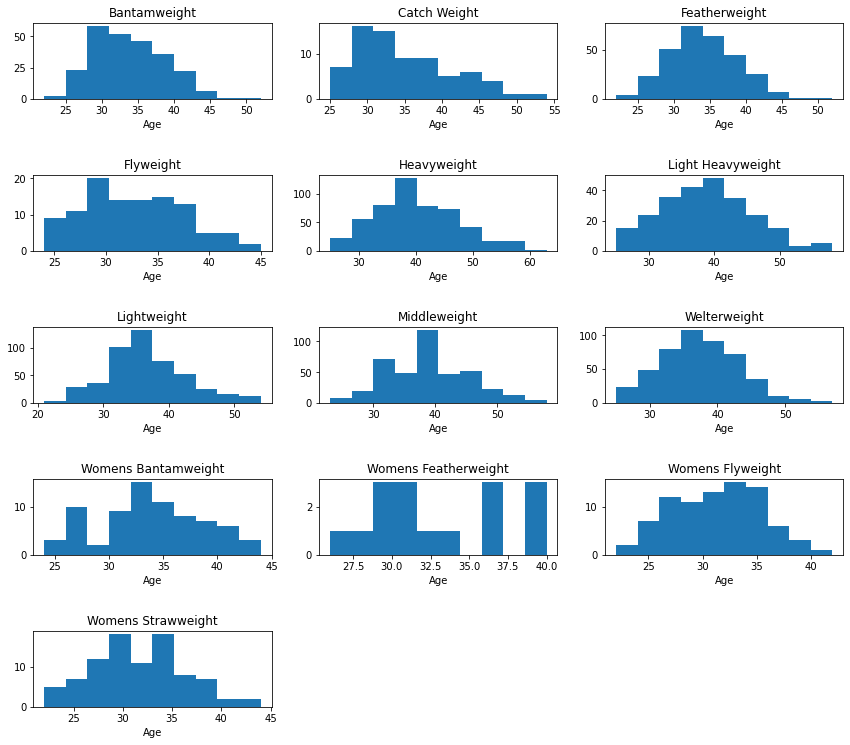

In [52]:
# add histogram plots
plt.subplot(5,3,1)
plt.hist(Bantamweight['Age'])
plt.title('Bantamweight')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(Catch_Weight['Age'])
plt.title('Catch Weight')
plt.xlabel('Age')

plt.subplot(5,3,3)
plt.hist(Featherweight['Age'])
plt.title('Featherweight')
plt.xlabel('Age')

plt.subplot(5,3,4)
plt.hist(Flyweight['Age'])
plt.title('Flyweight')
plt.xlabel('Age')

plt.subplot(5,3,5)
plt.hist(Heavyweight['Age'])
plt.title('Heavyweight')
plt.xlabel('Age')

plt.subplot(5,3,6)
plt.hist(Light_Heavyweight['Age'])
plt.title('Light Heavyweight')
plt.xlabel('Age')

plt.subplot(5,3,7)
plt.hist(Lightweight['Age'])
plt.title('Lightweight')
plt.xlabel('Age')

plt.subplot(5,3,8)
plt.hist(Middleweight['Age'])
plt.title('Middleweight')
plt.xlabel('Age')

plt.subplot(5,3,9)
plt.hist(Welterweight['Age'])
plt.title('Welterweight')
plt.xlabel('Age')

plt.subplot(5,3,10)
plt.hist(Women_Bantamweight['Age'])
plt.title('Womens Bantamweight')
plt.xlabel('Age')

plt.subplot(5,3,11)
plt.hist(Women_Featherweight['Age'])
plt.title('Womens Featherweight')
plt.xlabel('Age')

plt.subplot(5,3,12)
plt.hist(Women_Flyweight['Age'])
plt.title('Womens Flyweight')
plt.xlabel('Age')

plt.subplot(5,3,13)
plt.hist(Women_Strawweight['Age'])
plt.title('Womens Strawweight')
plt.xlabel('Age')

plt.subplots_adjust(top=2.5,right=2.0, hspace=1.0)
plt.savefig('../discovery/weight_class_Age_distro.jpg', bbox_inches="tight", dpi=450)
plt.show()

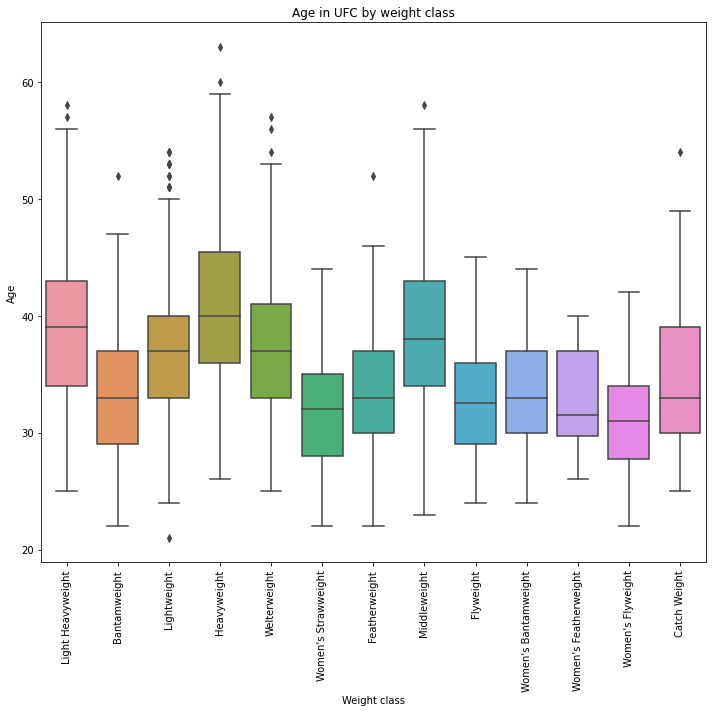

In [53]:
# box plots of height
fig, ax = plt.subplots(figsize=(10,10))

# box plot
sn.boxplot(x=fighter_ages['Weight class'], y=fighter_ages['Age'])

# title
plt.title('Age in UFC by weight class')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('../discovery/age_box_weightclasses.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [54]:
# get mean median mode for ages in weightclasses
fighter_ages_wc = fighter_ages.copy()

fighter_ages_wc_mean = fighter_ages_wc.groupby('Weight class')['Age'].mean()
fighter_ages_wc_mean = fighter_ages_wc_mean.to_frame()
fighter_ages_wc_mean.rename(columns={'Age':'Mean Age'}, inplace=True)
fighter_ages_wc_mean.reset_index(inplace=True)

fighter_ages_wc_median = fighter_ages_wc.groupby('Weight class')['Age'].median()
fighter_ages_wc_median = fighter_ages_wc_median.to_frame()
fighter_ages_wc_median.rename(columns={'Age':'Median Age'}, inplace=True)
fighter_ages_wc_median.reset_index(inplace=True)

fighter_ages_wc_mode = fighter_ages_wc.groupby('Weight class')['Age'].agg(
    lambda x: pd.Series.mode(x)[0])
fighter_ages_wc_mode = fighter_ages_wc_mode.to_frame()
fighter_ages_wc_mode.rename(columns={'Age':'Mode Age'}, inplace=True)
fighter_ages_wc_mode.reset_index(inplace=True)

fighter_age_stats = fighter_ages_wc_mean.merge(
    fighter_ages_wc_median, on='Weight class').merge(fighter_ages_wc_mode, on='Weight class')


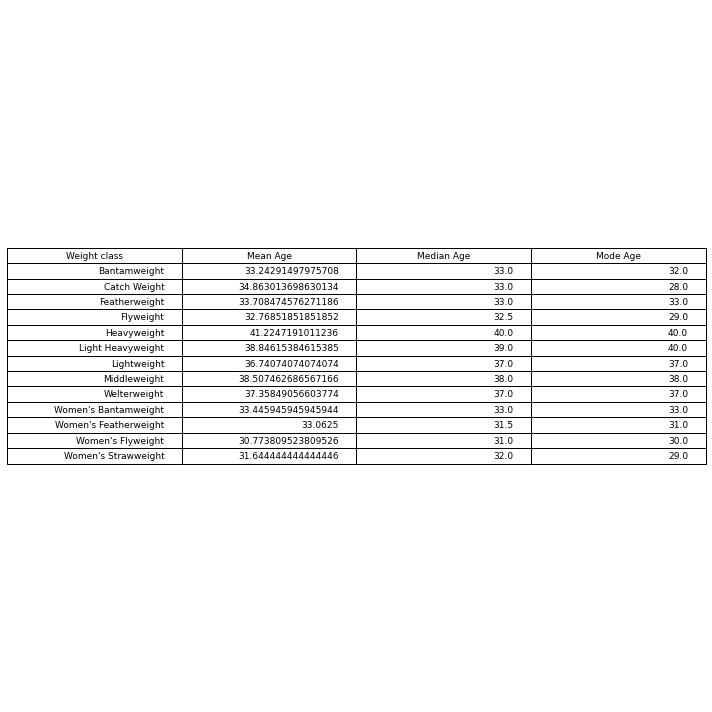

In [55]:
# plot a table of the stances count and percentages
fig, ax = plt.subplots(figsize=(10,10))

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=fighter_age_stats.values, colLabels = fighter_age_stats.columns, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/age_stats_weightclass.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [56]:
# get mean median mode for overaqll ages 
fighter_ages_overall = fighter_ages.copy()

fighter_ages_mean = fighter_ages_overall['Age'].mean()

fighter_ages_median = fighter_ages_overall['Age'].median()

fighter_ages_mode = fighter_ages_overall['Age'].agg(
    lambda x: pd.Series.mode(x)[0])

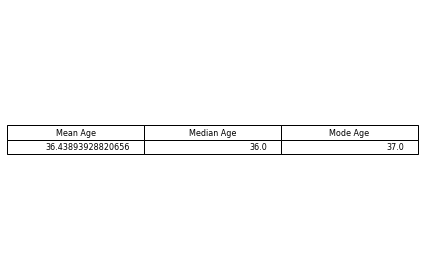

In [57]:
# plot a table of the stances correlations
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

height_table = pd.DataFrame([[fighter_ages_mean,fighter_ages_median,fighter_ages_mode]], 
                            columns=['Mean Age','Median Age','Mode Age'])

#create the table
table = ax.table(cellText=height_table.values, colLabels=height_table.columns, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/age_mean_mode_median.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [58]:
# create duplicate of main dataframe
fighter_age = import_and_create_df().copy()

In [59]:
# add age at the time of each event
event_date = pd.to_datetime(fighter_age['Date'])

fighter_age['DOB F_1'] = pd.to_datetime(fighter_age['DOB F_1'], format='%Y-%m-%d')
fighter_age['DOB F_2'] = pd.to_datetime(fighter_age['DOB F_2'], format='%Y-%m-%d')

fighter_age['Age F_1'] = (event_date - fighter_age['DOB F_1']).astype('<m8[Y]') 
fighter_age['Age F_2'] = (event_date - fighter_age['DOB F_2']).astype('<m8[Y]') 

In [60]:
fighter_age.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2,Age F_1,Age F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,2,2,26,43,1,1,1,1,42.0,38.0
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,23,24,168,443,1,2,0,0,28.0,29.0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,3,3,4,13,0,0,0,0,30.0,31.0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,4,5,47,121,11,18,0,0,33.0,35.0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0,0,0,1,0,0,0,0,27.0,33.0


In [61]:
# check if winner was younger or older
fighter_age['Winner Age'] = np.where(fighter_age['Age F_1'] < fighter_age['Age F_2'],'Younger','Older')
fighter_age.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2,Age F_1,Age F_2,Winner Age
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,2,26,43,1,1,1,1,42.0,38.0,Older
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,24,168,443,1,2,0,0,28.0,29.0,Younger
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,3,4,13,0,0,0,0,30.0,31.0,Younger
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,5,47,121,11,18,0,0,33.0,35.0,Younger
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0,0,1,0,0,0,0,27.0,33.0,Younger


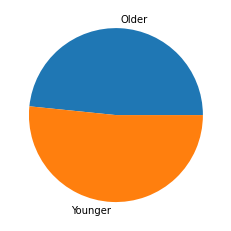

In [62]:
fighter_age_1 = fighter_age.groupby('Winner Age')['Winner Age'].count()
fighter_age_1 = fighter_age_1.to_frame()
fighter_age_1.rename(columns={'Winner Age':'Count'}, inplace=True)
fighter_age_1.reset_index(inplace=True)

plt.pie(fighter_age_1['Count'], labels=fighter_age_1['Winner Age'])
plt.savefig('../discovery/winner_age.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [63]:
# create the the observed and expected results for Older v Younger
def older_v_younger(df):
    
    # get the number of fights
    num_fights = len(df)
    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Older'] * len(df[df['Winner Age'].str.contains('Older')]) + \
                       ['Younger'] * len(df[df['Winner Age'].str.contains('Younger')]))
    
    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Older'] * flights_split + ['Younger'] * flights_split)
    
    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [64]:
age_data = older_v_younger(fighter_age)
age_observed = age_data[0]
age_expected = age_data[1]

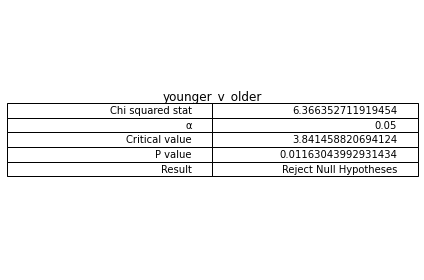

In [65]:
# apply the chi squared test to the results
chi_squared_test('younger_v_older',age_observed, age_expected, 1, 0.05)

In [66]:
# create the the observed and expected results for older v younger
def older_v_younger_weightclasses(df, weightclass, gender):
    
    if(gender == 'M'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (~df['Weight class'].str.contains('Women'))]
    elif(gender == 'F'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (df['Weight class'].str.contains('Women'))]
    
    # get the number of fights
    num_fights = len(df)
    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Older'] * len(df[df['Winner Age'].str.contains('Older')]) + \
                       ['Younger'] * len(df[df['Winner Age'].str.contains('Younger')]))
    
    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Older'] * flights_split + ['Younger'] * flights_split)
    
    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [67]:
# get data for each of the mens weight classes, pass in weight class and M for Male or F for female

# Flyweighgt
age_fly_data = older_v_younger_weightclasses(fighter_age,'Flyweight', 'M')
age_fly_observed = age_fly_data[0]
age_fly_expected = age_fly_data[1]

# Bantamweight
age_bw_data = older_v_younger_weightclasses(fighter_age,'Bantamweight', 'M')
age_bw_observed = age_bw_data[0]
age_bw_expected = age_bw_data[1]

# Featherweight
age_fw_data = older_v_younger_weightclasses(fighter_age,'Featherweight', 'M')
age_fw_observed = age_fw_data[0]
age_fw_expected = age_fw_data[1]

# Lightweight
age_lw_data = older_v_younger_weightclasses(fighter_age,'Lightweight', 'M')
age_lw_observed = age_lw_data[0]
age_lw_expected = age_lw_data[1]

# Welterweight
age_ww_data = older_v_younger_weightclasses(fighter_age,'Welterweight', 'M')
age_ww_observed = age_ww_data[0]
age_ww_expected = age_ww_data[1]

# Middelweight
age_mw_data = older_v_younger_weightclasses(fighter_age,'Middleweight', 'M')
age_mw_observed = age_mw_data[0]
age_mw_expected = age_mw_data[1]

# Light Heavy weight
age_lhw_data = older_v_younger_weightclasses(fighter_age,'Light Heavyweight', 'M')
age_lhw_observed = age_lhw_data[0]
age_lhw_expected = age_lhw_data[1]

# Heavyweight
age_hw_data = older_v_younger_weightclasses(fighter_age,'Heavyweight', 'M')
age_hw_observed = age_hw_data[0]
age_hw_expected = age_hw_data[1]

# Catchweight
age_cw_data = older_v_younger_weightclasses(fighter_age,'Catch Weight', 'M')
age_cw_observed = age_cw_data[0]
age_cw_expected = age_cw_data[1]

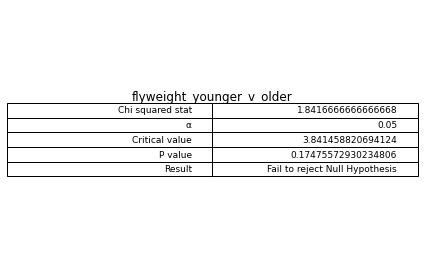

In [68]:
# apply the chi squared test to the results
chi_squared_test('flyweight_younger_v_older',age_fly_observed, age_fly_expected, 1, 0.05)

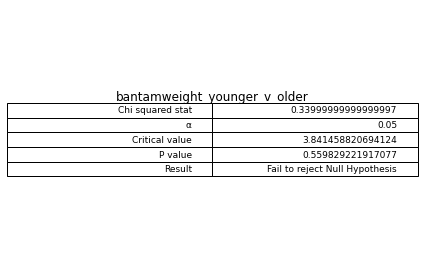

In [69]:
# apply the chi squared test to the results
chi_squared_test('bantamweight_younger_v_older',age_bw_observed, age_bw_expected, 1, 0.05)

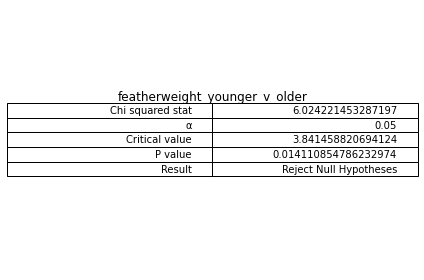

In [70]:
# apply the chi squared test to the results
chi_squared_test('featherweight_younger_v_older',age_fw_observed, age_fw_expected, 1, 0.05)

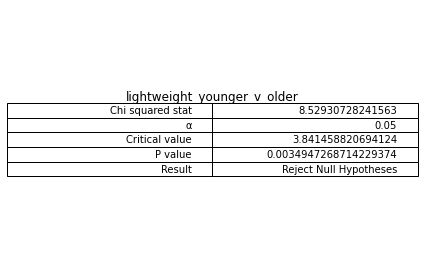

In [71]:
# apply the chi squared test to the results
chi_squared_test('lightweight_younger_v_older',age_lw_observed, age_lw_expected, 1, 0.05)

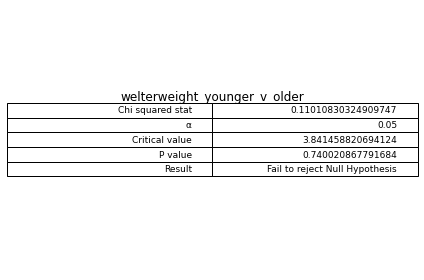

In [72]:
# apply the chi squared test to the results
chi_squared_test('welterweight_younger_v_older',age_ww_observed, age_ww_expected, 1, 0.05)

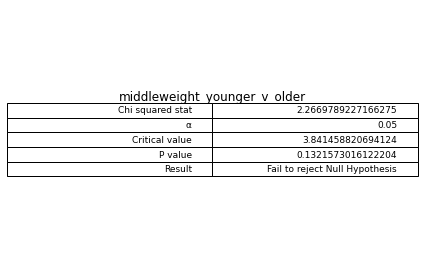

In [73]:
# apply the chi squared test to the results
chi_squared_test('middleweight_younger_v_older',age_mw_observed, age_mw_expected, 1, 0.05)

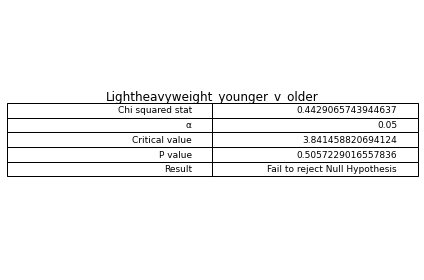

In [74]:
# apply the chi squared test to the results
chi_squared_test('Lightheavyweight_younger_v_older',age_lhw_observed, age_lhw_expected, 1, 0.05)

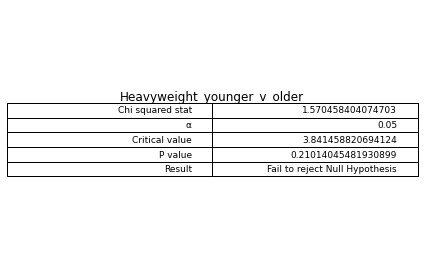

In [75]:
# apply the chi squared test to the results
chi_squared_test('Heavyweight_younger_v_older',age_hw_observed, age_hw_expected, 1, 0.05)

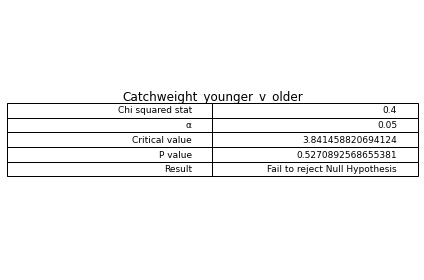

In [76]:
# apply the chi squared test to the results
chi_squared_test('Catchweight_younger_v_older',age_cw_observed, age_cw_expected, 1, 0.05)

In [77]:
# get data for each of the womens weight classes, pass in weight class and M for Male or F for female

# Strawweighgt
age_wstraw_data = older_v_younger_weightclasses(fighter_age,'Strawweight', 'F')
age_wstraw_observed = age_wstraw_data[0]
age_wstraw_expected = age_wstraw_data[1]

# Flyweighgt
age_wfly_data = older_v_younger_weightclasses(fighter_age,'Flyweight', 'F')
age_wfly_observed = age_wfly_data[0]
age_wfly_expected = age_wfly_data[1]

# Bantamweight
age_wbw_data = older_v_younger_weightclasses(fighter_age,'Bantamweight', 'F')
age_wbw_observed = age_wbw_data[0]
age_wbw_expected = age_wbw_data[1]

# Featherweight
age_wfw_data = older_v_younger_weightclasses(fighter_age,'Featherweight', 'F')
age_wfw_observed = age_wfw_data[0]
age_wfw_expected = age_wfw_data[1]

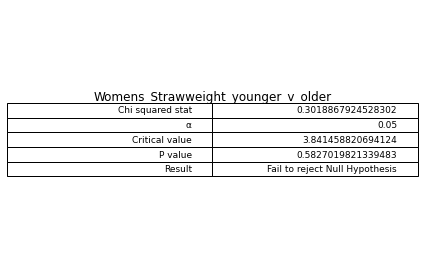

In [78]:
# apply the chi squared test to the results
chi_squared_test('Womens_Strawweight_younger_v_older',age_wstraw_observed, age_wstraw_expected, 1, 0.05)

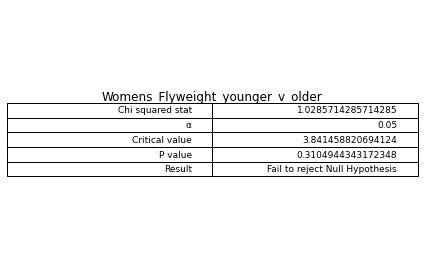

In [79]:
# apply the chi squared test to the results
chi_squared_test('Womens_Flyweight_younger_v_older',age_wfly_observed, age_wfly_expected, 1, 0.05)

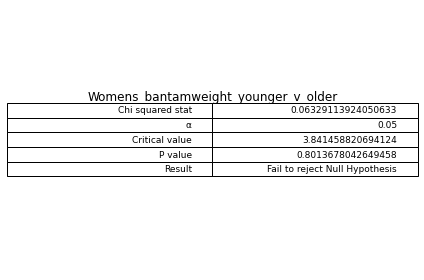

In [80]:
# apply the chi squared test to the results
chi_squared_test('Womens_bantamweight_younger_v_older',age_wbw_observed, age_wbw_expected, 1, 0.05)

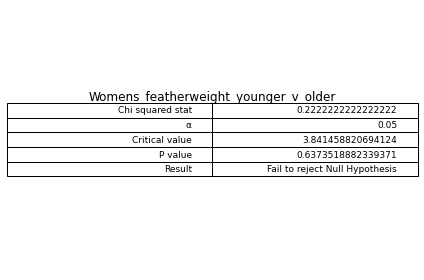

In [81]:
# apply the chi squared test to the results
chi_squared_test('Womens_featherweight_younger_v_older',age_wfw_observed, age_wfw_expected, 1, 0.05)

In [82]:
# seperate out the weight classes for pie charts

# Seperate out each weight class
Bantamweight = fighter_age[(fighter_age['Weight class'].str.contains('Bantamweight', na=False))& 
                (~fighter_age['Weight class'].str.contains('Women'))]            
Catch_Weight = fighter_age[fighter_age['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = fighter_age[(fighter_age['Weight class'].str.contains('Featherweight', na=False))& 
                (~fighter_age['Weight class'].str.contains('Women'))]           
Flyweight = fighter_age[(fighter_age['Weight class'].str.contains('Flyweight', na=False))& 
                (~fighter_age['Weight class'].str.contains('Women'))]                
Heavyweight = fighter_age[fighter_age['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = fighter_age[fighter_age['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = fighter_age[fighter_age['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = fighter_age[fighter_age['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = fighter_age[fighter_age['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = fighter_age[fighter_age['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = fighter_age[fighter_age['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = fighter_age[fighter_age['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = fighter_age[fighter_age['Weight class'].str.contains("Women's Strawweight", na=False)] 

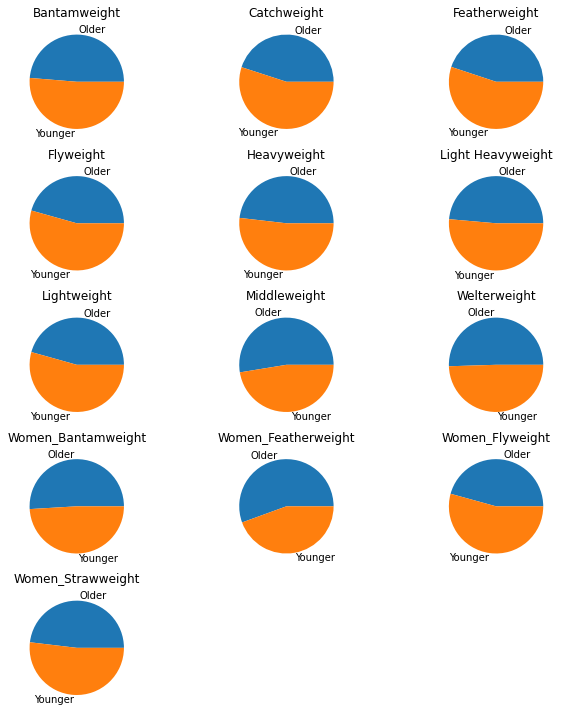

In [83]:
# bantamweight
Bantamweight_age = Bantamweight.groupby('Winner Age')['Winner Age'].count()
Bantamweight_age = Bantamweight_age.to_frame()
Bantamweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Bantamweight_age.reset_index(inplace=True)

plt.subplot(5,3,1)
plt.pie(Bantamweight_age['Count'], labels=Bantamweight_age['Winner Age'])
plt.title('Bantamweight')

# catchweight
Catch_Weight_age = Catch_Weight.groupby('Winner Age')['Winner Age'].count()
Catch_Weight_age = Catch_Weight_age.to_frame()
Catch_Weight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Catch_Weight_age.reset_index(inplace=True)

plt.subplot(5,3,2)
plt.pie(Catch_Weight_age['Count'], labels=Catch_Weight_age['Winner Age'])
plt.title('Catchweight')

# featherweight
Featherweight_age = Featherweight.groupby('Winner Age')['Winner Age'].count()
Featherweight_age = Featherweight_age.to_frame()
Featherweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Featherweight_age.reset_index(inplace=True)

plt.subplot(5,3,3)
plt.pie(Featherweight_age['Count'], labels=Featherweight_age['Winner Age'])
plt.title('Featherweight')

# flyweight
Flyweight_age = Flyweight.groupby('Winner Age')['Winner Age'].count()
Flyweight_age = Flyweight_age.to_frame()
Flyweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Flyweight_age.reset_index(inplace=True)

plt.subplot(5,3,4)
plt.pie(Flyweight_age['Count'], labels=Flyweight_age['Winner Age'])
plt.title('Flyweight')

# Heavyweight
Heavyweight_age = Heavyweight.groupby('Winner Age')['Winner Age'].count()
Heavyweight_age = Heavyweight_age.to_frame()
Heavyweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Heavyweight_age.reset_index(inplace=True)

plt.subplot(5,3,5)
plt.pie(Heavyweight_age['Count'], labels=Heavyweight_age['Winner Age'])
plt.title('Heavyweight')

# Light_Heavyweight
Light_Heavyweight_age = Light_Heavyweight.groupby('Winner Age')['Winner Age'].count()
Light_Heavyweight_age = Light_Heavyweight_age.to_frame()
Light_Heavyweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Light_Heavyweight_age.reset_index(inplace=True)

plt.subplot(5,3,6)
plt.pie(Light_Heavyweight_age['Count'], labels=Light_Heavyweight_age['Winner Age'])
plt.title('Light Heavyweight')

# Lightweight
Lightweight_age = Lightweight.groupby('Winner Age')['Winner Age'].count()
Lightweight_age = Lightweight_age.to_frame()
Lightweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Lightweight_age.reset_index(inplace=True)

plt.subplot(5,3,7)
plt.pie(Lightweight_age['Count'], labels=Lightweight_age['Winner Age'])
plt.title('Lightweight')

# Middleweight
Middleweight_age = Middleweight.groupby('Winner Age')['Winner Age'].count()
Middleweight_age = Middleweight_age.to_frame()
Middleweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Middleweight_age.reset_index(inplace=True)

plt.subplot(5,3,8)
plt.pie(Middleweight_age['Count'], labels=Middleweight_age['Winner Age'])
plt.title('Middleweight')

# Welterweight
Welterweight_age = Welterweight.groupby('Winner Age')['Winner Age'].count()
Welterweight_age = Welterweight_age.to_frame()
Welterweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Welterweight_age.reset_index(inplace=True)

plt.subplot(5,3,9)
plt.pie(Welterweight_age['Count'], labels=Welterweight_age['Winner Age'])
plt.title('Welterweight')

# Women_Bantamweight
Women_Bantamweight_age = Women_Bantamweight.groupby('Winner Age')['Winner Age'].count()
Women_Bantamweight_age = Women_Bantamweight_age.to_frame()
Women_Bantamweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Women_Bantamweight_age.reset_index(inplace=True)

plt.subplot(5,3,10)
plt.pie(Women_Bantamweight_age['Count'], labels=Women_Bantamweight_age['Winner Age'])
plt.title('Women_Bantamweight')

# Women_Featherweight
Women_Featherweight_age = Women_Featherweight.groupby('Winner Age')['Winner Age'].count()
Women_Featherweight_age = Women_Featherweight_age.to_frame()
Women_Featherweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Women_Featherweight_age.reset_index(inplace=True)

plt.subplot(5,3,11)
plt.pie(Women_Featherweight_age['Count'], labels=Women_Featherweight_age['Winner Age'])
plt.title('Women_Featherweight')

# Women_Flyweight
Women_Flyweight_age = Women_Flyweight.groupby('Winner Age')['Winner Age'].count()
Women_Flyweight_age = Women_Flyweight_age.to_frame()
Women_Flyweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Women_Flyweight_age.reset_index(inplace=True)

plt.subplot(5,3,12)
plt.pie(Women_Flyweight_age['Count'], labels=Women_Flyweight_age['Winner Age'])
plt.title('Women_Flyweight')

# Women_Strawweight
Women_Strawweight_age = Women_Strawweight.groupby('Winner Age')['Winner Age'].count()
Women_Strawweight_age = Women_Strawweight_age.to_frame()
Women_Strawweight_age.rename(columns={'Winner Age':'Count'}, inplace=True)
Women_Strawweight_age.reset_index(inplace=True)

plt.subplot(5,3,13)
plt.pie(Women_Strawweight_age['Count'], labels=Women_Strawweight_age['Winner Age'])
plt.title('Women_Strawweight')


plt.subplots_adjust(top=2.5, right=1.5)
plt.savefig('../discovery/winner_age_weightclass.jpg', bbox_inches="tight", dpi=450)
plt.show()


## Fighter Height

Investigate wether a fighters height has any statistical difference when comparing
taller versus shorter to the outcome in a fight

Check the mean and mode for height in the UFC

In [84]:
# height basic df
height_basic = fighter_basic.copy()

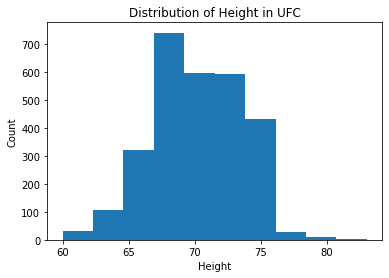

In [85]:
# plot the height distribution of UFC fighters
plt.hist(height_basic['Height'])
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height in UFC')
plt.savefig('../discovery/height_distribution.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [86]:
# seperate out the weight classes for pie charts

# Seperate out each weight class
Bantamweight = height_basic[(height_basic['Weight class'].str.contains('Bantamweight', na=False))& 
                (~height_basic['Weight class'].str.contains('Women'))]            
Catch_Weight = height_basic[height_basic['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = height_basic[(height_basic['Weight class'].str.contains('Featherweight', na=False))& 
                (~height_basic['Weight class'].str.contains('Women'))]           
Flyweight = height_basic[(height_basic['Weight class'].str.contains('Flyweight', na=False))& 
                (~height_basic['Weight class'].str.contains('Women'))]                
Heavyweight = height_basic[height_basic['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = height_basic[height_basic['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = height_basic[height_basic['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = height_basic[height_basic['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = height_basic[height_basic['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = height_basic[height_basic['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = height_basic[height_basic['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = height_basic[height_basic['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = height_basic[height_basic['Weight class'].str.contains("Women's Strawweight", na=False)] 

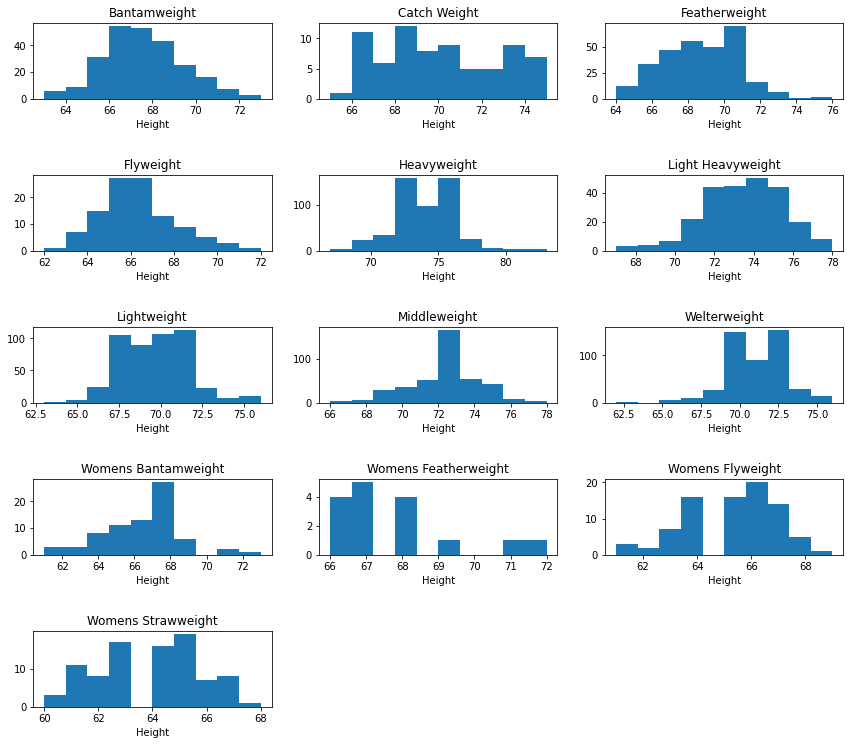

In [87]:
# add histogram plots
plt.subplot(5,3,1)
plt.hist(Bantamweight['Height'])
plt.title('Bantamweight')
plt.xlabel('Height')

plt.subplot(5,3,2)
plt.hist(Catch_Weight['Height'])
plt.title('Catch Weight')
plt.xlabel('Height')

plt.subplot(5,3,3)
plt.hist(Featherweight['Height'])
plt.title('Featherweight')
plt.xlabel('Height')

plt.subplot(5,3,4)
plt.hist(Flyweight['Height'])
plt.title('Flyweight')
plt.xlabel('Height')

plt.subplot(5,3,5)
plt.hist(Heavyweight['Height'])
plt.title('Heavyweight')
plt.xlabel('Height')

plt.subplot(5,3,6)
plt.hist(Light_Heavyweight['Height'])
plt.title('Light Heavyweight')
plt.xlabel('Height')

plt.subplot(5,3,7)
plt.hist(Lightweight['Height'])
plt.title('Lightweight')
plt.xlabel('Height')

plt.subplot(5,3,8)
plt.hist(Middleweight['Height'])
plt.title('Middleweight')
plt.xlabel('Height')

plt.subplot(5,3,9)
plt.hist(Welterweight['Height'])
plt.title('Welterweight')
plt.xlabel('Height')

plt.subplot(5,3,10)
plt.hist(Women_Bantamweight['Height'])
plt.title('Womens Bantamweight')
plt.xlabel('Height')

plt.subplot(5,3,11)
plt.hist(Women_Featherweight['Height'])
plt.title('Womens Featherweight')
plt.xlabel('Height')

plt.subplot(5,3,12)
plt.hist(Women_Flyweight['Height'])
plt.title('Womens Flyweight')
plt.xlabel('Height')

plt.subplot(5,3,13)
plt.hist(Women_Strawweight['Height'])
plt.title('Womens Strawweight')
plt.xlabel('Height')

plt.subplots_adjust(top=2.5,right=2.0, hspace=1.0)
plt.savefig('../discovery/weight_class_height_distro.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [88]:
# get the median, mean and mode heights in UFC
mean_height = height_basic['Height'].mean()

median_height = height_basic['Height'].median()
 
mode_height = height_basic['Height'].agg(
    lambda x: pd.Series.mode(x)[0])

In [89]:
# get mean median mode for ages in weightclasses
fighter_height_wc = fighter_basic.copy()

fighter_height_wc_mean = fighter_height_wc.groupby('Weight class')['Height'].mean()
fighter_height_wc_mean = fighter_height_wc_mean.to_frame()
fighter_height_wc_mean.rename(columns={'Height':'Mean Height'}, inplace=True)
fighter_height_wc_mean.reset_index(inplace=True)

fighter_height_wc_median = fighter_height_wc.groupby('Weight class')['Height'].median()
fighter_height_wc_median = fighter_height_wc_median.to_frame()
fighter_height_wc_median.rename(columns={'Height':'Median Height'}, inplace=True)
fighter_height_wc_median.reset_index(inplace=True)

fighter_height_wc_mode = fighter_height_wc.groupby('Weight class')['Height'].agg(
    lambda x: pd.Series.mode(x)[0])
fighter_height_wc_mode = fighter_height_wc_mode.to_frame()
fighter_height_wc_mode.rename(columns={'Height':'Mode Height'}, inplace=True)
fighter_height_wc_mode.reset_index(inplace=True)

fighter_height_stats = fighter_height_wc_mean.merge(
    fighter_height_wc_median, on='Weight class').merge(fighter_height_wc_mode, on='Weight class')
fighter_height_stats

,Weight class,Mean Height,Median Height,Mode Height
0,Bantamweight,67.072874,67,66
1,Catch Weight,69.630137,69,68
2,Featherweight,68.610169,68,68
3,Flyweight,65.833333,66,65
4,Heavyweight,74.243446,74,75
5,Light Heavyweight,73.372470,73,74
6,Lightweight,69.695473,70,70
7,Middleweight,72.231343,72,72
8,Welterweight,70.976939,71,72
9,Women's Bantamweight,66.270270,66,67


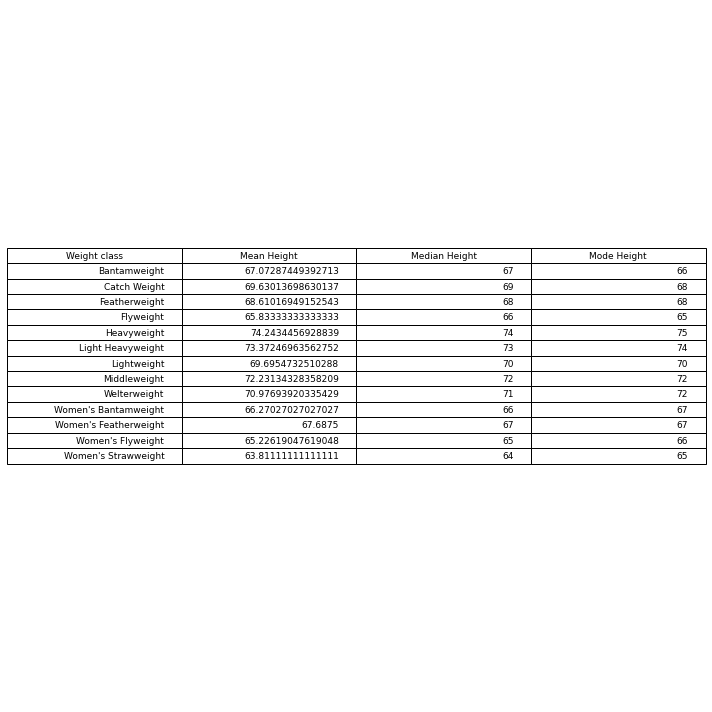

In [90]:
# plot a table of the stances count and percentages
fig, ax = plt.subplots(figsize=(10,10))

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create the table
table = ax.table(cellText=fighter_height_stats.values, colLabels = fighter_height_stats.columns, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/height_stats_weightclass.jpg', bbox_inches="tight", dpi=450)
plt.show()

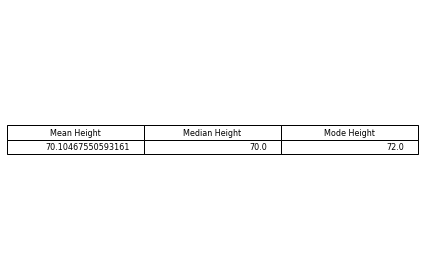

In [91]:
# plot a table of the stances correlations
fig, ax = plt.subplots()

# hide the axis
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

height_table = pd.DataFrame([[mean_height,median_height,mode_height]], 
                            columns=['Mean Height','Median Height','Mode Height'])

#create the table
table = ax.table(cellText=height_table.values, colLabels=height_table.columns, loc='center')

# disply and save the table
fig.tight_layout()
plt.savefig('../discovery/height_mean_mode_median.jpg', bbox_inches="tight", dpi=450)
plt.show()


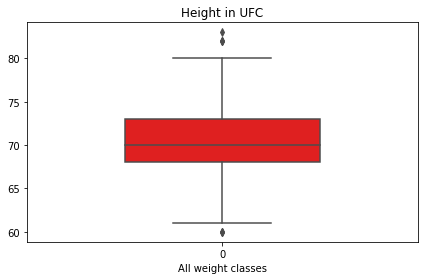

In [92]:
# box plots of height
fig, ax = plt.subplots()

# box plot
sn.boxplot(data=height_basic['Height'], color='red', width=.5)

# title
plt.title('Height in UFC')
plt.xlabel('All weight classes')

plt.tight_layout()
plt.savefig('../discovery/height_box.jpg', bbox_inches="tight", dpi=450)
plt.show()


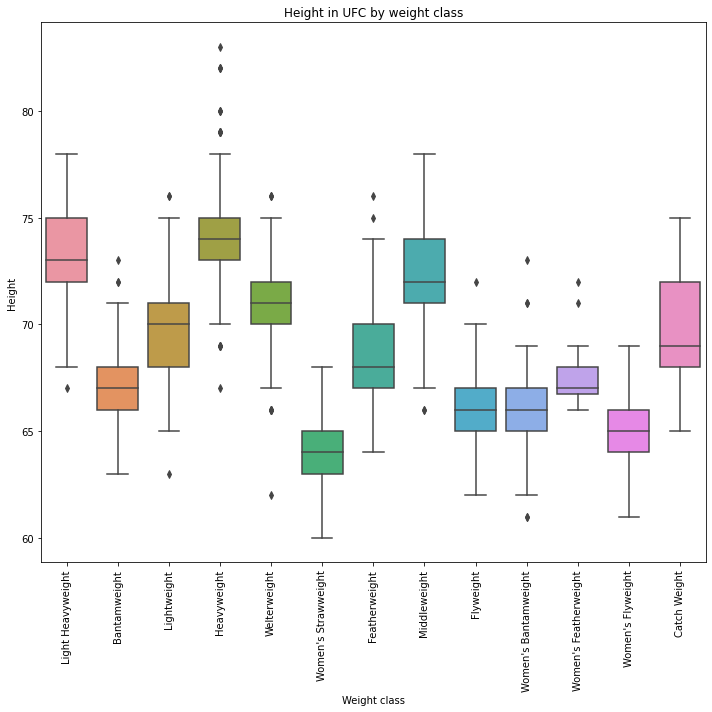

In [93]:
# height grouped by weightclasses df
height_wc = fighter_basic.copy()

height_wc = height_wc.reindex(columns=['Weight class', 'Height'])

# box plots of height
fig, ax = plt.subplots(figsize=(10,10))

# box plot
sn.boxplot(x=height_wc['Weight class'], y=height_wc['Height'])

# title
plt.title('Height in UFC by weight class')
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('../discovery/height_box_weightclasses.jpg', bbox_inches="tight", dpi=450)
plt.show()


In [94]:
# add a column for taller versus shorter in the main data frame
fighters_height = import_and_create_df().copy()

fighters_height['Winner Height'] = np.where(fighters_height['Height F_1'] > fighters_height['Height F_2'],
                                           'Taller', 'Shorter')

fighters_height.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2,Winner Height
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6,2,2,26,43,1,1,1,1,Shorter
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,32,23,24,168,443,1,2,0,0,Shorter
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0,3,3,4,13,0,0,0,0,Shorter
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,17,4,5,47,121,11,18,0,0,Taller
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0,0,0,0,1,0,0,0,0,Taller


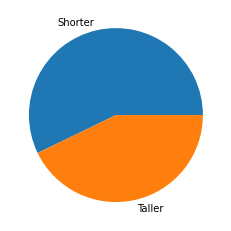

In [95]:
fighter_height_1 = fighters_height.groupby('Winner Height')['Winner Height'].count()
fighter_height_1 = fighter_height_1.to_frame()
fighter_height_1.rename(columns={'Winner Height':'Count'}, inplace=True)
fighter_height_1.reset_index(inplace=True)

plt.pie(fighter_height_1['Count'], labels=fighter_height_1['Winner Height'])
plt.savefig('../discovery/winner_height.jpg', bbox_inches="tight", dpi=450)
plt.show()

In [96]:
# seperate out the weight classes for pie charts

# Seperate out each weight class
Bantamweight = fighters_height[(fighters_height['Weight class'].str.contains('Bantamweight', na=False))& 
                (~fighters_height['Weight class'].str.contains('Women'))]            
Catch_Weight = fighters_height[fighters_height['Weight class'].str.contains('Catch Weight', na=False)]            
Featherweight = fighters_height[(fighters_height['Weight class'].str.contains('Featherweight', na=False))& 
                (~fighters_height['Weight class'].str.contains('Women'))]           
Flyweight = fighters_height[(fighters_height['Weight class'].str.contains('Flyweight', na=False))& 
                (~fighters_height['Weight class'].str.contains('Women'))]                
Heavyweight = fighters_height[fighters_height['Weight class'].str.contains('Heavyweight', na=False)]              
Light_Heavyweight = fighters_height[fighters_height['Weight class'].str.contains('Light Heavyweight', na=False)] 
Lightweight = fighters_height[fighters_height['Weight class'].str.contains('Lightweight', na=False)]      
Middleweight = fighters_height[fighters_height['Weight class'].str.contains('Middleweight', na=False)]             
Welterweight = fighters_height[fighters_height['Weight class'].str.contains('Welterweight', na=False)]           
Women_Bantamweight = fighters_height[fighters_height['Weight class'].str.contains("Women's Bantamweight", na=False)] 
Women_Featherweight = fighters_height[fighters_height['Weight class'].str.contains("Women's Featherweight", na=False)]   
Women_Flyweight = fighters_height[fighters_height['Weight class'].str.contains("Women's Flyweight", na=False)]  
Women_Strawweight = fighters_height[fighters_height['Weight class'].str.contains("Women's Strawweight", na=False)] 

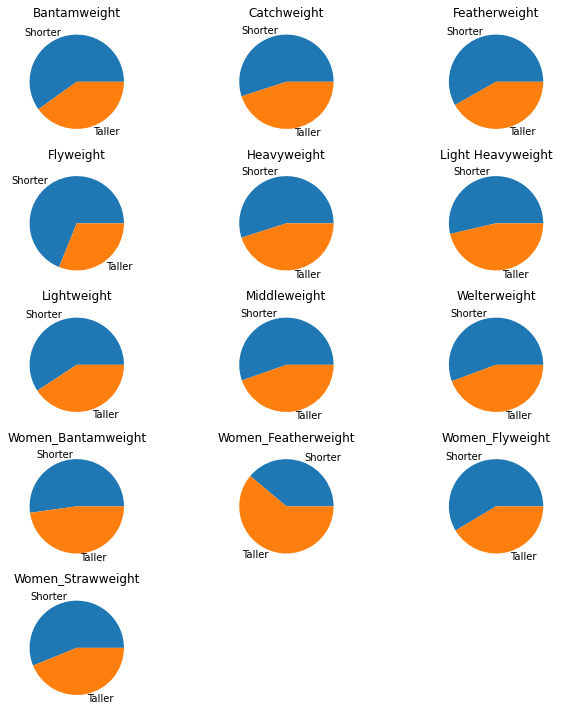

In [97]:
# bantamweight
Bantamweight_Height = Bantamweight.groupby('Winner Height')['Winner Height'].count()
Bantamweight_Height = Bantamweight_Height.to_frame()
Bantamweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Bantamweight_Height.reset_index(inplace=True)

plt.subplot(5,3,1)
plt.pie(Bantamweight_Height['Count'], labels=Bantamweight_Height['Winner Height'])
plt.title('Bantamweight')

# catchweight
Catch_Weight_Height = Catch_Weight.groupby('Winner Height')['Winner Height'].count()
Catch_Weight_Height = Catch_Weight_Height.to_frame()
Catch_Weight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Catch_Weight_Height.reset_index(inplace=True)

plt.subplot(5,3,2)
plt.pie(Catch_Weight_Height['Count'], labels=Catch_Weight_Height['Winner Height'])
plt.title('Catchweight')

# featherweight
Featherweight_Height = Featherweight.groupby('Winner Height')['Winner Height'].count()
Featherweight_Height = Featherweight_Height.to_frame()
Featherweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Featherweight_Height.reset_index(inplace=True)

plt.subplot(5,3,3)
plt.pie(Featherweight_Height['Count'], labels=Featherweight_Height['Winner Height'])
plt.title('Featherweight')

# flyweight
Flyweight_Height = Flyweight.groupby('Winner Height')['Winner Height'].count()
Flyweight_Height = Flyweight_Height.to_frame()
Flyweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Flyweight_Height.reset_index(inplace=True)

plt.subplot(5,3,4)
plt.pie(Flyweight_Height['Count'], labels=Flyweight_Height['Winner Height'])
plt.title('Flyweight')

# Heavyweight
Heavyweight_Height = Heavyweight.groupby('Winner Height')['Winner Height'].count()
Heavyweight_Height = Heavyweight_Height.to_frame()
Heavyweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Heavyweight_Height.reset_index(inplace=True)

plt.subplot(5,3,5)
plt.pie(Heavyweight_Height['Count'], labels=Heavyweight_Height['Winner Height'])
plt.title('Heavyweight')

# Light_Heavyweight
Light_Heavyweight_Height = Light_Heavyweight.groupby('Winner Height')['Winner Height'].count()
Light_Heavyweight_Height = Light_Heavyweight_Height.to_frame()
Light_Heavyweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Light_Heavyweight_Height.reset_index(inplace=True)

plt.subplot(5,3,6)
plt.pie(Light_Heavyweight_Height['Count'], labels=Light_Heavyweight_Height['Winner Height'])
plt.title('Light Heavyweight')

# Lightweight
Lightweight_Height = Lightweight.groupby('Winner Height')['Winner Height'].count()
Lightweight_Height = Lightweight_Height.to_frame()
Lightweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Lightweight_Height.reset_index(inplace=True)

plt.subplot(5,3,7)
plt.pie(Lightweight_Height['Count'], labels=Lightweight_Height['Winner Height'])
plt.title('Lightweight')

# Middleweight
Middleweight_Height = Middleweight.groupby('Winner Height')['Winner Height'].count()
Middleweight_Height = Middleweight_Height.to_frame()
Middleweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Middleweight_Height.reset_index(inplace=True)

plt.subplot(5,3,8)
plt.pie(Middleweight_Height['Count'], labels=Middleweight_Height['Winner Height'])
plt.title('Middleweight')

# Welterweight
Welterweight_Height = Welterweight.groupby('Winner Height')['Winner Height'].count()
Welterweight_Height = Welterweight_Height.to_frame()
Welterweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Welterweight_Height.reset_index(inplace=True)

plt.subplot(5,3,9)
plt.pie(Welterweight_Height['Count'], labels=Welterweight_Height['Winner Height'])
plt.title('Welterweight')

# Women_Bantamweight
Women_Bantamweight_Height = Women_Bantamweight.groupby('Winner Height')['Winner Height'].count()
Women_Bantamweight_Height = Women_Bantamweight_Height.to_frame()
Women_Bantamweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Women_Bantamweight_Height.reset_index(inplace=True)

plt.subplot(5,3,10)
plt.pie(Women_Bantamweight_Height['Count'], labels=Women_Bantamweight_Height['Winner Height'])
plt.title('Women_Bantamweight')

# Women_Featherweight
Women_Featherweight_Height = Women_Featherweight.groupby('Winner Height')['Winner Height'].count()
Women_Featherweight_Height = Women_Featherweight_Height.to_frame()
Women_Featherweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Women_Featherweight_Height.reset_index(inplace=True)

plt.subplot(5,3,11)
plt.pie(Women_Featherweight_Height['Count'], labels=Women_Featherweight_Height['Winner Height'])
plt.title('Women_Featherweight')

# Women_Flyweight
Women_Flyweight_Height = Women_Flyweight.groupby('Winner Height')['Winner Height'].count()
Women_Flyweight_Height = Women_Flyweight_Height.to_frame()
Women_Flyweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Women_Flyweight_Height.reset_index(inplace=True)

plt.subplot(5,3,12)
plt.pie(Women_Flyweight_Height['Count'], labels=Women_Flyweight_Height['Winner Height'])
plt.title('Women_Flyweight')

# Women_Strawweight
Women_Strawweight_Height = Women_Strawweight.groupby('Winner Height')['Winner Height'].count()
Women_Strawweight_Height = Women_Strawweight_Height.to_frame()
Women_Strawweight_Height.rename(columns={'Winner Height':'Count'}, inplace=True)
Women_Strawweight_Height.reset_index(inplace=True)

plt.subplot(5,3,13)
plt.pie(Women_Strawweight_Height['Count'], labels=Women_Strawweight_Height['Winner Height'])
plt.title('Women_Strawweight')


plt.subplots_adjust(top=2.5, right=1.5)
plt.savefig('../discovery/winner_Height_weightclass.jpg', bbox_inches="tight", dpi=450)
plt.show()


In [98]:
# create the the observed and expected results for Taller v Shorter
def taller_v_shorter(df):
    
    # get the number of fights
    num_fights = len(df)
    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Taller'] * len(df[df['Winner Height'].str.contains('Taller')]) + \
                       ['Shorter'] * len(df[df['Winner Height'].str.contains('Shorter')]))
    
    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Taller'] * flights_split + ['Shorter'] * flights_split)
    
    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [99]:
# get the height data
height_data = taller_v_shorter(fighters_height)
height_observed = height_data[0]
height_expected = height_data[1]

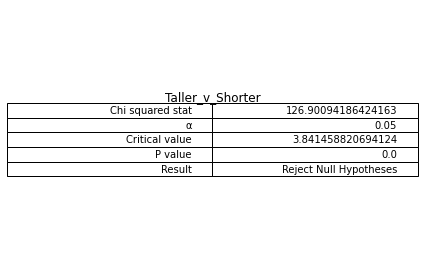

In [100]:
# apply the chi squared test to the results
chi_squared_test('Taller_v_Shorter',height_observed, height_expected, 1, 0.05)

In [101]:
# create the the observed and expected results for Orthodox v Southpaw
def taller_v_shorter_weightclasses(df, weightclass, gender):
    
    if(gender == 'M'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (~df['Weight class'].str.contains('Women'))]
    elif(gender == 'F'):
        df = df[(df['Weight class'].str.contains(weightclass))& 
                (df['Weight class'].str.contains('Women'))]
    
    # get the number of fights
    num_fights = len(df)
    # 50/50 chance so divide num of fights by 2
    flights_split = int((num_fights /2))

    # create a new dataframe with the number or observed results
    df1 = pd.DataFrame(['Taller'] * len(df[df['Winner Height'].str.contains('Taller')]) + \
                       ['Shorter'] * len(df[df['Winner Height'].str.contains('Shorter')]))
    
    #  create a new dataframe with the number of expected 50/50 results
    df2 = pd.DataFrame(['Shorter'] * flights_split + ['Taller'] * flights_split)
    
    # create cross tabs of each dataframe
    observed = pd.crosstab(index=df1[0], columns ='count')
    expected = pd.crosstab(index=df2[0], columns = 'count')
    
    return observed , expected

In [102]:
# get data for each of the mens weight classes, pass in weight class and M for Male or F for female

# Flyweighgt
height_fly_data = taller_v_shorter_weightclasses(fighters_height,'Flyweight', 'M')
height_fly_observed = height_fly_data[0]
height_fly_expected = height_fly_data[1]

# Bantamweight
height_bw_data = taller_v_shorter_weightclasses(fighters_height,'Bantamweight', 'M')
height_bw_observed = height_bw_data[0]
height_bw_expected = height_bw_data[1]

# Featherweight
height_fw_data = taller_v_shorter_weightclasses(fighters_height,'Featherweight', 'M')
height_fw_observed = height_fw_data[0]
height_fw_expected = height_fw_data[1]

# Lightweight
height_lw_data = taller_v_shorter_weightclasses(fighters_height,'Lightweight', 'M')
height_lw_observed = height_lw_data[0]
height_lw_expected = height_lw_data[1]

# Welterweight
height_ww_data = taller_v_shorter_weightclasses(fighters_height,'Welterweight', 'M')
height_ww_observed = height_ww_data[0]
height_ww_expected = height_ww_data[1]

# Middelweight
height_mw_data = taller_v_shorter_weightclasses(fighters_height,'Middleweight', 'M')
height_mw_observed = height_mw_data[0]
height_mw_expected = height_mw_data[1]

# Light Heavy weight
height_lhw_data = taller_v_shorter_weightclasses(fighters_height,'Light Heavyweight', 'M')
height_lhw_observed = height_lhw_data[0]
height_lhw_expected = height_lhw_data[1]

# Heavyweight
height_hw_data = taller_v_shorter_weightclasses(fighters_height,'Heavyweight', 'M')
height_hw_observed = height_hw_data[0]
height_hw_expected = height_hw_data[1]

# Catchweight
height_cw_data = taller_v_shorter_weightclasses(fighters_height,'Catch Weight', 'M')
height_cw_observed = height_cw_data[0]
height_cw_expected = height_cw_data[1]

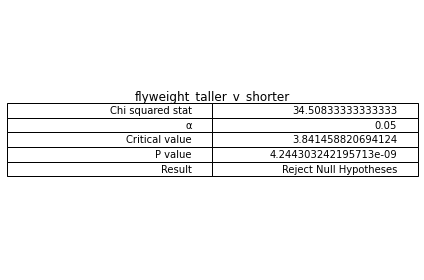

In [103]:
# apply the chi squared test to the results
chi_squared_test('flyweight_taller_v_shorter',height_fly_observed, height_fly_expected, 1, 0.05)

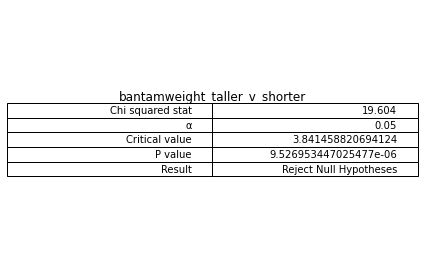

In [104]:
# apply the chi squared test to the results
chi_squared_test('bantamweight_taller_v_shorter',height_bw_observed, height_bw_expected, 1, 0.05)

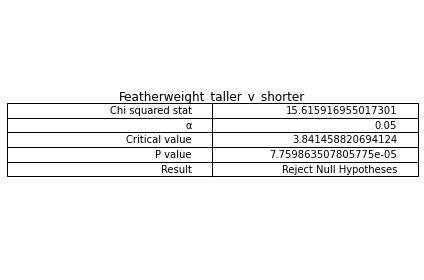

In [105]:
# apply the chi squared test to the results
chi_squared_test('Featherweight_taller_v_shorter',height_fw_observed, height_fw_expected, 1, 0.05)

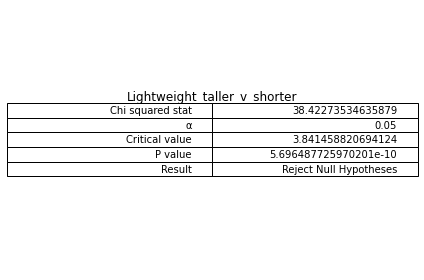

In [106]:
# apply the chi squared test to the results
chi_squared_test('Lightweight_taller_v_shorter',height_lw_observed, height_lw_expected, 1, 0.05)

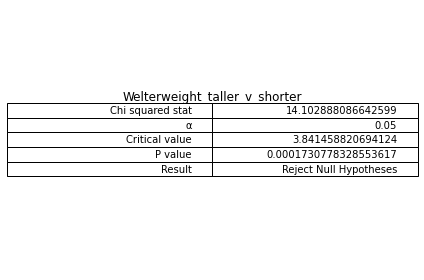

In [107]:
# apply the chi squared test to the results
chi_squared_test('Welterweight_taller_v_shorter',height_ww_observed, height_ww_expected, 1, 0.05)

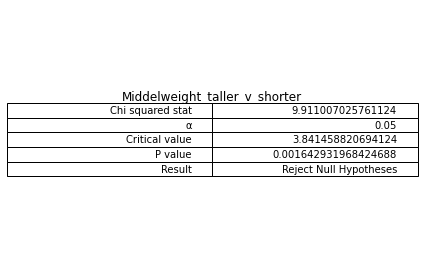

In [108]:
# apply the chi squared test to the results
chi_squared_test('Middelweight_taller_v_shorter',height_mw_observed, height_mw_expected, 1, 0.05)

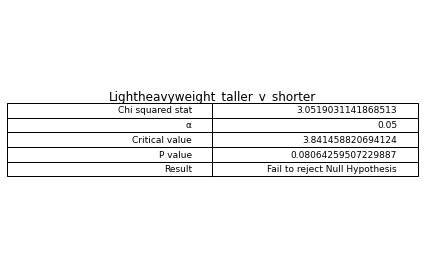

In [109]:
# apply the chi squared test to the results
chi_squared_test('Lightheavyweight_taller_v_shorter',height_lhw_observed, height_lhw_expected, 1, 0.05)

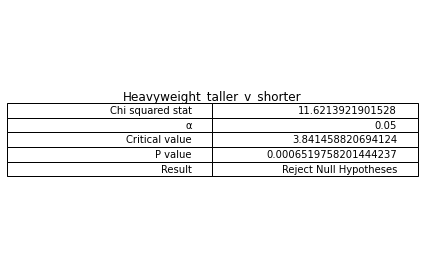

In [110]:
# apply the chi squared test to the results
chi_squared_test('Heavyweight_taller_v_shorter',height_hw_observed, height_hw_expected, 1, 0.05)

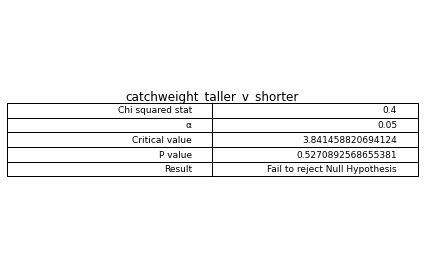

In [111]:
# apply the chi squared test to the results
chi_squared_test('catchweight_taller_v_shorter',height_cw_observed, height_cw_expected, 1, 0.05)

In [112]:
# get data for each of the womens weight classes, pass in weight class and M for Male or F for female

# Strawweighgt
height_wstraw_data = taller_v_shorter_weightclasses(fighters_height,'Strawweight', 'F')
height_wstraw_observed = height_wstraw_data[0]
height_wstraw_expected = height_wstraw_data[1]

# Flyweighgt
height_wfly_data = taller_v_shorter_weightclasses(fighters_height,'Flyweight', 'F')
height_wfly_observed = height_wfly_data[0]
height_wfly_expected = height_wfly_data[1]

# Bantamweight
height_wbw_data = taller_v_shorter_weightclasses(fighters_height,'Bantamweight', 'F')
height_wbw_observed = height_wbw_data[0]
height_wbw_expected = height_wbw_data[1]

# Featherweight
height_wfw_data = taller_v_shorter_weightclasses(fighters_height,'Featherweight', 'F')
height_wfw_observed = height_wfw_data[0]
height_wfw_expected = height_wfw_data[1]

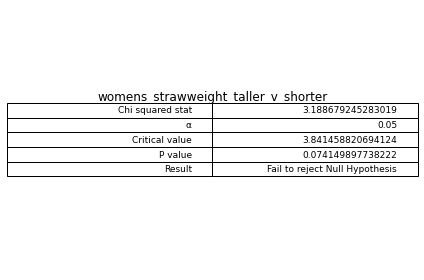

In [113]:
# apply the chi squared test to the results
chi_squared_test('womens_strawweight_taller_v_shorter',height_wstraw_observed, height_wstraw_expected, 1, 0.05)

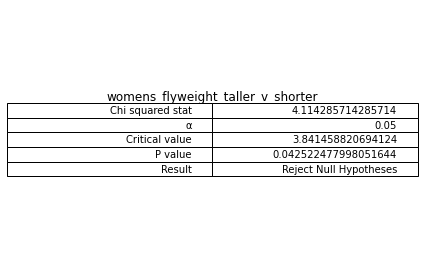

In [114]:
# apply the chi squared test to the results
chi_squared_test('womens_flyweight_taller_v_shorter',height_wfly_observed, height_wfly_expected, 1, 0.05)

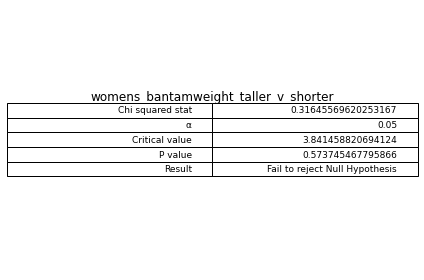

In [115]:
# apply the chi squared test to the results
chi_squared_test('womens_bantamweight_taller_v_shorter',height_wbw_observed, height_wbw_expected, 1, 0.05)

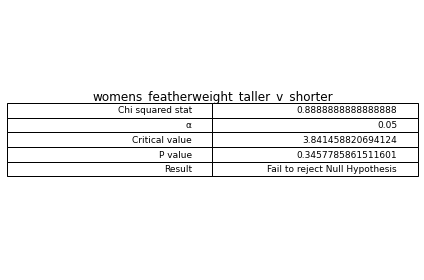

In [116]:
# apply the chi squared test to the results
chi_squared_test('womens_featherweight_taller_v_shorter',height_wfw_observed, height_wfw_expected, 1, 0.05)